In [1]:
# establish a connection with coingGecko API and fetch live prices for BTC and Ethereum

#fetch the top 10 cryptos by market cap
#fetch the top 10 cryptos by volume in last 24 hours

#fetch  historical crypto prices for BTC and Ethereum
# get live crypto prices for the top 5 crypto currencies

#calculate teh volume, volatility, market cap of various coins and pick the top 5 + 5 other outliers above a certain market cap
# fetch last 3 months historic data for ehteremum 
# charts for the above

# run a simple moving average trading algo on ethereum on last 3 months data
#calcualte the returns of the above strategy
#compare it with overall returns that ETH would have given anyways 


# these are for later 
# repeat the above for 5 years of daily data 
# repeat the above for BTC
# moudlarise the above and run on 3 more currencies: possibly MATIC, RIPPLE, Algorand, etc. 

# for much later
# visualise the strategy on a chart 

CoinGecko API docs are here https://www.coingecko.com/en/api/documentation

- Connect to pycoingecko, pandas and other libs needed
- I have created a vritual environment for this project
- I have also played around in postman in the coingecko collection to see how the API behaves
- I have notes on pandas in the notebook as well as in onenote under cryptotrading project under python and data analysis- so be sure to check both the notes and links directly in the notebook as well as teh one note notes to quickly review pandas, and many other learnings 

In [153]:
import pandas as pd
import json 
import matplotlib.pyplot as plt
import seaborn as sns
import random
import datetime

In [3]:
from pycoingecko import CoinGeckoAPI # API docs are here: https://www.coingecko.com/en/api/documentation 
cg = CoinGeckoAPI()

### Establish a connection with coingGecko API and fetch live prices for BTC and Ethereum

In [4]:
cg.get_price(ids=['bitcoin','ethereum'], vs_currencies='usd')

{'bitcoin': {'usd': 25878}, 'ethereum': {'usd': 1733.05}}

### Fetch the top 10 cryptos by market cap

In [5]:
cg.get_coins_markets(vs_currency='usd') # get market data in USD 

[{'id': 'bitcoin',
  'symbol': 'btc',
  'name': 'Bitcoin',
  'image': 'https://assets.coingecko.com/coins/images/1/large/bitcoin.png?1547033579',
  'current_price': 25878,
  'market_cap': 502072361379,
  'market_cap_rank': 1,
  'fully_diluted_valuation': 543420166783,
  'total_volume': 8666475772,
  'high_24h': 26047,
  'low_24h': 25792,
  'price_change_24h': 3.53,
  'price_change_percentage_24h': 0.01366,
  'market_cap_change_24h': 25541143,
  'market_cap_change_percentage_24h': 0.00509,
  'circulating_supply': 19402150.0,
  'total_supply': 21000000.0,
  'max_supply': 21000000.0,
  'ath': 69045,
  'ath_change_percentage': -62.52352,
  'ath_date': '2021-11-10T14:24:11.849Z',
  'atl': 67.81,
  'atl_change_percentage': 38059.46415,
  'atl_date': '2013-07-06T00:00:00.000Z',
  'roi': None,
  'last_updated': '2023-06-14T18:42:02.142Z'},
 {'id': 'ethereum',
  'symbol': 'eth',
  'name': 'Ethereum',
  'image': 'https://assets.coingecko.com/coins/images/279/large/ethereum.png?1595348880',
  'cu

In [6]:
current_market_data = pd.DataFrame(cg.get_coins_markets(vs_currency='usd')) # get the json into a pd dataframe

In [7]:
# explore the data frame
current_market_data.shape

(100, 26)

In [8]:
current_market_data.head(10).T

,0,1,2,3,4,5,6,7,8,9
id,bitcoin,ethereum,tether,binancecoin,usd-coin,ripple,staked-ether,cardano,dogecoin,tron
symbol,btc,eth,usdt,bnb,usdc,xrp,steth,ada,doge,trx
name,Bitcoin,Ethereum,Tether,BNB,USD Coin,XRP,Lido Staked Ether,Cardano,Dogecoin,TRON
image,https://assets.coingecko.com/coins/images/1/la...,https://assets.coingecko.com/coins/images/279/...,https://assets.coingecko.com/coins/images/325/...,https://assets.coingecko.com/coins/images/825/...,https://assets.coingecko.com/coins/images/6319...,https://assets.coingecko.com/coins/images/44/l...,https://assets.coingecko.com/coins/images/1344...,https://assets.coingecko.com/coins/images/975/...,https://assets.coingecko.com/coins/images/5/la...,https://assets.coingecko.com/coins/images/1094...
current_price,25878.0,1733.05,0.998819,245.88,0.999546,0.503258,1730.84,0.272038,0.061676,0.072422
market_cap,502072361379,208314681300,83458610005,38225415461,28088258225,26109688905,12453942561,9515885031,8614733726,6523730235
market_cap_rank,1,2,3,4,5,6,7,8,9,10
fully_diluted_valuation,543420166783.0,208314681300.0,83458610005.0,49052474916.0,28090983779.0,50223479100.0,12453942561.0,12218991921.0,8614742972.0,6523728397.0
total_volume,8666475772.0,4700185083.0,14189134518.0,1110040707.0,2207420950.0,1567588890.0,4705464.0,191611723.0,180424522.0,238125832.0
high_24h,26047.0,1749.65,1.002,251.24,1.002,0.525823,1749.52,0.277159,0.062298,0.072846


In [9]:
#columns we are interested in 
#"symbol", "name","current_price","market_cap","total_volume", "ath","ath_change_percentage"
## what is volume? how to read candlestick chart? what are top indicatros that traders use to predict direction/momentum?

In [10]:
current_market_data.columns

Index(['id', 'symbol', 'name', 'image', 'current_price', 'market_cap',
       'market_cap_rank', 'fully_diluted_valuation', 'total_volume',
       'high_24h', 'low_24h', 'price_change_24h',
       'price_change_percentage_24h', 'market_cap_change_24h',
       'market_cap_change_percentage_24h', 'circulating_supply',
       'total_supply', 'max_supply', 'ath', 'ath_change_percentage',
       'ath_date', 'atl', 'atl_change_percentage', 'atl_date', 'roi',
       'last_updated'],
      dtype='object')

In [11]:
current_market_data.dtypes

id                                   object
symbol                               object
name                                 object
image                                object
current_price                       float64
market_cap                            int64
market_cap_rank                       int64
fully_diluted_valuation             float64
total_volume                        float64
high_24h                            float64
low_24h                             float64
price_change_24h                    float64
price_change_percentage_24h         float64
market_cap_change_24h               float64
market_cap_change_percentage_24h    float64
circulating_supply                  float64
total_supply                        float64
max_supply                          float64
ath                                 float64
ath_change_percentage               float64
ath_date                             object
atl                                 float64
atl_change_percentage           

In [12]:
current_market_data.describe()

,current_price,market_cap,market_cap_rank,fully_diluted_valuation,total_volume,high_24h,low_24h,price_change_24h,price_change_percentage_24h,market_cap_change_24h,market_cap_change_percentage_24h,circulating_supply,total_supply,max_supply,ath,ath_change_percentage,atl,atl_change_percentage
count,1.000000e+02,1.000000e+02,100.000000,9.400000e+01,1.000000e+02,1.000000e+02,1.000000e+02,100.000000,100.000000,1.000000e+02,100.000000,1.000000e+02,9.400000e+01,5.800000e+01,100.000000,100.000000,1.000000e+02,1.000000e+02
mean,6.445253e+02,1.044462e+10,50.500000,1.274448e+10,3.870551e+08,6.487196e+02,6.418878e+02,0.433898,0.741187,-2.373362e+06,0.422758,1.987456e+13,2.595178e+13,2.469302e+13,1776.333307,-75.369907,8.919240e+01,1.393806e+05
std,3.650568e+03,5.460279e+10,29.011492,6.024587e+10,1.725529e+09,3.671714e+03,3.637325e+03,4.415599,2.638008,1.770324e+08,2.702207,1.185100e+14,1.500623e+14,1.403102e+14,9838.855894,26.222597,3.952765e+02,1.203133e+06
min,5.359550e-07,3.451530e+08,1.000000,3.894797e+08,1.285800e+02,5.407710e-07,5.344730e-07,-8.754012,-6.974710,-9.934676e+08,-7.178630,1.566277e+05,1.566277e+05,1.566277e+05,0.000003,-99.999920,5.636600e-11,2.155300e-01
25%,3.807400e-01,5.089979e+08,25.750000,6.538490e+08,7.563374e+06,3.847035e-01,3.729540e-01,-0.001312,-0.222885,-3.262835e+06,-0.424308,1.190834e+08,1.694202e+08,2.009951e+08,1.680000,-94.033912,2.733647e-02,5.595463e+01
50%,9.999400e-01,7.417302e+08,50.500000,1.226536e+09,2.779806e+07,1.003500e+00,9.968815e-01,0.001553,0.462965,2.206854e+06,0.230735,8.663036e+08,1.005705e+09,1.000000e+09,9.120000,-87.342440,3.642655e-01,3.362114e+02
75%,8.070000e+00,2.239662e+09,75.250000,4.842975e+09,7.614896e+07,8.165000e+00,7.975000e+00,0.052312,1.680380,1.272721e+07,1.404765,4.496706e+09,9.902560e+09,9.429902e+09,103.107500,-67.079442,9.767912e-01,3.596624e+03
max,2.589800e+04,5.020724e+11,100.000000,5.434202e+11,1.418913e+10,2.604700e+04,2.579600e+04,36.330000,16.086100,1.113160e+09,16.218550,9.514217e+14,9.999894e+14,9.900000e+14,70643.000000,-4.384880,3.139170e+03,1.201992e+07


In [13]:
current_market_data.sort_values(by="market_cap", ascending=False)[0:10] # grab the top 10 cyptos by market cap

,id,symbol,name,image,current_price,market_cap,market_cap_rank,fully_diluted_valuation,total_volume,high_24h,...,total_supply,max_supply,ath,ath_change_percentage,ath_date,atl,atl_change_percentage,atl_date,roi,last_updated
0,bitcoin,btc,Bitcoin,https://assets.coingecko.com/coins/images/1/la...,25878.000000,502072361379,1,5.434202e+11,8.666476e+09,26047.000000,...,2.100000e+07,2.100000e+07,69045.000000,-62.52352,2021-11-10T14:24:11.849Z,67.810000,38059.46415,2013-07-06T00:00:00.000Z,None,2023-06-14T18:42:02.142Z
1,ethereum,eth,Ethereum,https://assets.coingecko.com/coins/images/279/...,1733.050000,208314681300,2,2.083147e+11,4.700185e+09,1749.650000,...,1.202241e+08,NaN,4878.260000,-64.48309,2021-11-10T14:24:19.604Z,0.432979,400059.78047,2015-10-20T00:00:00.000Z,"{'times': 88.57111894007032, 'currency': 'btc'...",2023-06-14T18:42:05.350Z
2,tether,usdt,Tether,https://assets.coingecko.com/coins/images/325/...,0.998819,83458610005,3,8.345861e+10,1.418913e+10,1.002000,...,8.355731e+10,NaN,1.320000,-24.50893,2018-07-24T00:00:00.000Z,0.572521,74.45977,2015-03-02T00:00:00.000Z,None,2023-06-14T18:40:00.277Z
3,binancecoin,bnb,BNB,https://assets.coingecko.com/coins/images/825/...,245.880000,38225415461,4,4.905247e+10,1.110041e+09,251.240000,...,1.579002e+08,2.000000e+08,686.310000,-64.26344,2021-05-10T07:24:17.097Z,0.039818,615863.23218,2017-10-19T00:00:00.000Z,None,2023-06-14T18:41:59.974Z
4,usd-coin,usdc,USD Coin,https://assets.coingecko.com/coins/images/6319...,0.999546,28088258225,5,2.809098e+10,2.207421e+09,1.002000,...,2.806763e+10,NaN,1.170000,-14.65604,2019-05-08T00:40:28.300Z,0.877647,14.03609,2023-03-11T08:02:13.981Z,None,2023-06-14T18:42:04.885Z
5,ripple,xrp,XRP,https://assets.coingecko.com/coins/images/44/l...,0.503258,26109688905,6,5.022348e+10,1.567589e+09,0.525823,...,9.998888e+10,1.000000e+11,3.400000,-85.22816,2018-01-07T00:00:00.000Z,0.002686,18588.57418,2014-05-22T00:00:00.000Z,None,2023-06-14T18:41:59.633Z
6,staked-ether,steth,Lido Staked Ether,https://assets.coingecko.com/coins/images/1344...,1730.840000,12453942561,7,1.245394e+10,4.705464e+06,1749.520000,...,7.195720e+06,7.195720e+06,4829.570000,-64.22694,2021-11-10T14:40:47.256Z,482.900000,257.77568,2020-12-22T04:08:21.854Z,None,2023-06-14T18:42:05.344Z
7,cardano,ada,Cardano,https://assets.coingecko.com/coins/images/975/...,0.272038,9515885031,8,1.221899e+10,1.916117e+08,0.277159,...,4.500000e+10,4.500000e+10,3.090000,-91.20373,2021-09-02T06:00:10.474Z,0.019253,1310.36058,2020-03-13T02:22:55.044Z,None,2023-06-14T18:41:57.623Z
8,dogecoin,doge,Dogecoin,https://assets.coingecko.com/coins/images/5/la...,0.061676,8614733726,9,8.614743e+09,1.804245e+08,0.062298,...,1.397673e+11,NaN,0.731578,-91.57584,2021-05-08T05:08:23.458Z,0.000087,70816.72137,2015-05-06T00:00:00.000Z,None,2023-06-14T18:42:06.409Z
9,tron,trx,TRON,https://assets.coingecko.com/coins/images/1094...,0.072422,6523730235,10,6.523728e+09,2.381258e+08,0.072846,...,9.008013e+10,NaN,0.231673,-68.74253,2018-01-05T00:00:00.000Z,0.001804,3913.37707,2017-11-12T00:00:00.000Z,"{'times': 37.1170451890269, 'currency': 'usd',...",2023-06-14T18:42:06.493Z


In [14]:
top_crypto_mcap = current_market_data.sort_values(by="market_cap", ascending=False).loc[0:10,["symbol", "name","current_price","market_cap","total_volume", "ath","ath_change_percentage"]] # grab the top 5 cyptos by market cap
top_crypto_mcap # TOP 10 CRYTPOS BY MARKET CAP

,symbol,name,current_price,market_cap,total_volume,ath,ath_change_percentage
0,btc,Bitcoin,25878.000000,502072361379,8.666476e+09,69045.000000,-62.52352
1,eth,Ethereum,1733.050000,208314681300,4.700185e+09,4878.260000,-64.48309
2,usdt,Tether,0.998819,83458610005,1.418913e+10,1.320000,-24.50893
3,bnb,BNB,245.880000,38225415461,1.110041e+09,686.310000,-64.26344
4,usdc,USD Coin,0.999546,28088258225,2.207421e+09,1.170000,-14.65604
5,xrp,XRP,0.503258,26109688905,1.567589e+09,3.400000,-85.22816
6,steth,Lido Staked Ether,1730.840000,12453942561,4.705464e+06,4829.570000,-64.22694
7,ada,Cardano,0.272038,9515885031,1.916117e+08,3.090000,-91.20373
8,doge,Dogecoin,0.061676,8614733726,1.804245e+08,0.731578,-91.57584
9,trx,TRON,0.072422,6523730235,2.381258e+08,0.231673,-68.74253


### Fetch the top 10 cryptos by volume traded last 24 hours 

In [15]:
top_crypto_vol = current_market_data.sort_values(by="total_volume", ascending=False).reset_index(drop=True).loc[0:10,["symbol", "name","current_price","market_cap","total_volume", "ath","ath_change_percentage"]]


In [16]:
top_crypto_vol  # TOP CRYPTOS BY VOL TRADED IN LAST 24 HOURS 

,symbol,name,current_price,market_cap,total_volume,ath,ath_change_percentage
0,usdt,Tether,0.998819,83458610005,1.418913e+10,1.320000,-24.50893
1,btc,Bitcoin,25878.000000,502072361379,8.666476e+09,69045.000000,-62.52352
2,eth,Ethereum,1733.050000,208314681300,4.700185e+09,4878.260000,-64.48309
3,usdc,USD Coin,0.999546,28088258225,2.207421e+09,1.170000,-14.65604
4,xrp,XRP,0.503258,26109688905,1.567589e+09,3.400000,-85.22816
5,tusd,TrueUSD,1.002000,2043442678,1.283351e+09,1.620000,-38.15446
6,bnb,BNB,245.880000,38225415461,1.110041e+09,686.310000,-64.26344
7,busd,Binance USD,0.997778,4530194671,6.876744e+08,1.150000,-13.42928
8,ltc,Litecoin,76.980000,5627297168,3.115600e+08,410.260000,-81.24852
9,trx,TRON,0.072422,6523730235,2.381258e+08,0.231673,-68.74253


### Fetch  historical crypto prices for BTC and Ethereum


In [17]:
# GETTING BTC HISToRIcAL PRICES

In [18]:
btc_historical_prices_json= cg.get_coin_market_chart_by_id(id="bitcoin", vs_currency="usd",days="3500", interval="daily")

In [19]:
btc_historical_prices_json

{'prices': [[1384387200000, 408.84],
  [1384473600000, 424.16],
  [1384560000000, 437.41],
  [1384646400000, 488.36],
  [1384732800000, 580.87],
  [1384819200000, 614.4],
  [1384905600000, 565.34],
  [1384992000000, 675.06],
  [1385078400000, 731.15],
  [1385164800000, 819.31],
  [1385251200000, 764.43],
  [1385337600000, 793.07],
  [1385424000000, 832.93],
  [1385510400000, 914.13],
  [1385596800000, 979.08],
  [1385683200000, 1101.83],
  [1385769600000, 1127.45],
  [1385856000000, 1033.39],
  [1385942400000, 974.03],
  [1386028800000, 1078.64],
  [1386115200000, 1121.48],
  [1386201600000, 989.04],
  [1386288000000, 1019.66],
  [1386374400000, 811.98],
  [1386460800000, 743.11],
  [1386547200000, 897.89],
  [1386633600000, 927.78],
  [1386720000000, 887.08],
  [1386806400000, 878.17],
  [1386892800000, 897.27],
  [1386979200000, 866.99],
  [1387065600000, 854.62],
  [1387152000000, 789.15],
  [1387238400000, 691.65],
  [1387324800000, 559.36],
  [1387411200000, 677.84],
  [1387497600

In [20]:
# experimenting to solve my datetime problem here temporarily3
#import datetime
#timestamp = datetime.datetime.fromtimestamp(1383436800)
#print(timestamp.strftime('%Y-%m-%d %H:%M:%S'))

In [21]:
btc_historical_prices=pd.DataFrame(btc_historical_prices_json['prices'], columns =['date','price']).merge(
    pd.DataFrame(btc_historical_prices_json['market_caps'], columns =['date','market_cap']), on="date").merge(
    pd.DataFrame(btc_historical_prices_json['total_volumes'], columns =['date','volume']), on="date")

In [22]:
btc_historical_prices.dtypes

date            int64
price         float64
market_cap    float64
volume        float64
dtype: object

In [23]:
btc_historical_prices['coin']=["btc"]*len(btc_historical_prices.index)

In [24]:
btc_historical_prices

,date,price,market_cap,volume,coin
0,1384387200000,408.840000,4.902329e+09,0.000000e+00,btc
1,1384473600000,424.160000,5.087746e+09,0.000000e+00,btc
2,1384560000000,437.410000,5.248843e+09,0.000000e+00,btc
3,1384646400000,488.360000,5.862542e+09,0.000000e+00,btc
4,1384732800000,580.870000,6.975450e+09,0.000000e+00,btc
...,...,...,...,...,...
3495,1686441600000,25858.122892,5.016539e+11,9.755627e+09,btc
3496,1686528000000,25916.579896,5.026830e+11,1.043999e+10,btc
3497,1686614400000,25910.362743,5.025627e+11,9.761692e+09,btc
3498,1686700800000,25872.206459,5.017523e+11,9.921876e+09,btc


In [25]:
btc_historical_prices

,date,price,market_cap,volume,coin
0,1384387200000,408.840000,4.902329e+09,0.000000e+00,btc
1,1384473600000,424.160000,5.087746e+09,0.000000e+00,btc
2,1384560000000,437.410000,5.248843e+09,0.000000e+00,btc
3,1384646400000,488.360000,5.862542e+09,0.000000e+00,btc
4,1384732800000,580.870000,6.975450e+09,0.000000e+00,btc
...,...,...,...,...,...
3495,1686441600000,25858.122892,5.016539e+11,9.755627e+09,btc
3496,1686528000000,25916.579896,5.026830e+11,1.043999e+10,btc
3497,1686614400000,25910.362743,5.025627e+11,9.761692e+09,btc
3498,1686700800000,25872.206459,5.017523e+11,9.921876e+09,btc


In [26]:
eth_historical_prices_json= cg.get_coin_market_chart_by_id(id="ethereum", vs_currency="usd",days="3500", interval="daily")

In [27]:
eth_historical_prices_json

{'prices': [[1438905600000, 2.83162],
  [1438992000000, 1.33075],
  [1439164800000, 0.6875857090838133],
  [1439251200000, 1.067378879429946],
  [1439337600000, 1.256613175101658],
  [1439424000000, 1.825395446319752],
  [1439510400000, 1.825974891355639],
  [1439596800000, 1.670949668937766],
  [1439683200000, 1.476607254205028],
  [1439769600000, 1.20387143115441],
  [1439856000000, 1.281393051659975],
  [1439942400000, 1.252738651679077],
  [1440028800000, 1.484195074171873],
  [1440115200000, 1.40631477379752],
  [1440201600000, 1.380721536476638],
  [1440288000000, 1.355182100454404],
  [1440374400000, 1.24657168269902],
  [1440460800000, 1.160828327907264],
  [1440547200000, 1.119639156482987],
  [1440633600000, 1.133690694008804],
  [1440720000000, 1.188895698722608],
  [1440806400000, 1.174343905252208],
  [1440892800000, 1.322350879918967],
  [1440979200000, 1.353368417391325],
  [1441065600000, 1.350786688734447],
  [1441152000000, 1.278810765308764],
  [1441238400000, 1.2627

In [28]:
eth_historical_prices=pd.DataFrame(eth_historical_prices_json['prices'], columns =['date','price']).merge(
    pd.DataFrame(eth_historical_prices_json['market_caps'], columns =['date','market_cap']), on="date").merge(
    pd.DataFrame(eth_historical_prices_json['total_volumes'], columns =['date','volume']), on="date")

In [29]:
eth_historical_prices

,date,price,market_cap,volume
0,1438905600000,2.831620,0.000000e+00,9.062200e+04
1,1438992000000,1.330750,8.033948e+07,3.680700e+05
2,1439164800000,0.687586,4.155631e+07,4.004641e+05
3,1439251200000,1.067379,6.453901e+07,1.518998e+06
4,1439337600000,1.256613,7.601326e+07,2.073893e+06
...,...,...,...,...
2864,1686441600000,1754.673228,2.109501e+11,4.141785e+10
2865,1686528000000,1751.724597,2.106040e+11,5.031836e+09
2866,1686614400000,1742.596053,2.094627e+11,6.731497e+09
2867,1686700800000,1736.789437,2.087040e+11,6.798862e+09


In [30]:
eth_historical_prices['coin']=["eth"]*len(eth_historical_prices.index)

In [31]:
eth_historical_prices

,date,price,market_cap,volume,coin
0,1438905600000,2.831620,0.000000e+00,9.062200e+04,eth
1,1438992000000,1.330750,8.033948e+07,3.680700e+05,eth
2,1439164800000,0.687586,4.155631e+07,4.004641e+05,eth
3,1439251200000,1.067379,6.453901e+07,1.518998e+06,eth
4,1439337600000,1.256613,7.601326e+07,2.073893e+06,eth
...,...,...,...,...,...
2864,1686441600000,1754.673228,2.109501e+11,4.141785e+10,eth
2865,1686528000000,1751.724597,2.106040e+11,5.031836e+09,eth
2866,1686614400000,1742.596053,2.094627e+11,6.731497e+09,eth
2867,1686700800000,1736.789437,2.087040e+11,6.798862e+09,eth


In [32]:
# COMBINING THE PRICE DATA

In [33]:
# appendix the 2 price data frames source: https://pandas.pydata.org/docs/user_guide/merging.html
# btc_eth_historical_prices = pd.concat([btc_historical_prices,eth_historical_prices]).reset_index(drop=True)
#DECIDED NOT TO USE combined dataframe as little use of doing that
#btc_eth_historical_prices
#DECIDED NOT TO USE combined dataframe as little use of doing that
#del(btc_eth_historical_prices)
#btc_historical_prices['date'] = btc_historical_prices['date'].astype('int')

In [34]:
eth_historical_prices.dtypes

date            int64
price         float64
market_cap    float64
volume        float64
coin           object
dtype: object

In [35]:
# dividing by 1000 as datetime was causing issues in conversion 
eth_historical_prices['date'] = list (map( lambda n: int(float(n)/1000), eth_historical_prices['date']))
# dividing by 1000 as datetime was causing issues in conversion 
btc_historical_prices['date'] = list (map( lambda n: int(float(n)/1000), btc_historical_prices['date']))

In [36]:
# convert unix ms timestamp to date from 
# https://stackoverflow.com/questions/19231871/convert-unix-time-to-readable-date-in-pandas-dataframe 
btc_historical_prices['date']=pd.to_datetime(btc_historical_prices['date'],unit='s')
eth_historical_prices['date']=pd.to_datetime(eth_historical_prices['date'],unit='s')

In [37]:
btc_historical_prices

,date,price,market_cap,volume,coin
0,2013-11-14 00:00:00,408.840000,4.902329e+09,0.000000e+00,btc
1,2013-11-15 00:00:00,424.160000,5.087746e+09,0.000000e+00,btc
2,2013-11-16 00:00:00,437.410000,5.248843e+09,0.000000e+00,btc
3,2013-11-17 00:00:00,488.360000,5.862542e+09,0.000000e+00,btc
4,2013-11-18 00:00:00,580.870000,6.975450e+09,0.000000e+00,btc
...,...,...,...,...,...
3495,2023-06-11 00:00:00,25858.122892,5.016539e+11,9.755627e+09,btc
3496,2023-06-12 00:00:00,25916.579896,5.026830e+11,1.043999e+10,btc
3497,2023-06-13 00:00:00,25910.362743,5.025627e+11,9.761692e+09,btc
3498,2023-06-14 00:00:00,25872.206459,5.017523e+11,9.921876e+09,btc


In [38]:
eth_historical_prices

,date,price,market_cap,volume,coin
0,2015-08-07 00:00:00,2.831620,0.000000e+00,9.062200e+04,eth
1,2015-08-08 00:00:00,1.330750,8.033948e+07,3.680700e+05,eth
2,2015-08-10 00:00:00,0.687586,4.155631e+07,4.004641e+05,eth
3,2015-08-11 00:00:00,1.067379,6.453901e+07,1.518998e+06,eth
4,2015-08-12 00:00:00,1.256613,7.601326e+07,2.073893e+06,eth
...,...,...,...,...,...
2864,2023-06-11 00:00:00,1754.673228,2.109501e+11,4.141785e+10,eth
2865,2023-06-12 00:00:00,1751.724597,2.106040e+11,5.031836e+09,eth
2866,2023-06-13 00:00:00,1742.596053,2.094627e+11,6.731497e+09,eth
2867,2023-06-14 00:00:00,1736.789437,2.087040e+11,6.798862e+09,eth


In [39]:
# add 7,30,90,180 days moving average for price and volume 
# good link explaining this is here:
#https://www.geeksforgeeks.org/how-to-calculate-moving-average-in-a-pandas-dataframe/ 
# HOW do I ensure that DF is sorted on date-time? Should I make it an index? what does Index do?

In [40]:
#### I will do ETH from here on again, once done with BTC once!!! to save labour and make good progress #####

In [41]:
btc_historical_prices['price_sma_7']= btc_historical_prices['price'].rolling(7).mean()
btc_historical_prices['price_sma_30']= btc_historical_prices['price'].rolling(30).mean()
btc_historical_prices['price_sma_90']= btc_historical_prices['price'].rolling(90).mean()
btc_historical_prices['price_sma_180']= btc_historical_prices['price'].rolling(180).mean()

In [42]:
btc_historical_prices

,date,price,market_cap,volume,coin,price_sma_7,price_sma_30,price_sma_90,price_sma_180
0,2013-11-14 00:00:00,408.840000,4.902329e+09,0.000000e+00,btc,NaN,NaN,NaN,NaN
1,2013-11-15 00:00:00,424.160000,5.087746e+09,0.000000e+00,btc,NaN,NaN,NaN,NaN
2,2013-11-16 00:00:00,437.410000,5.248843e+09,0.000000e+00,btc,NaN,NaN,NaN,NaN
3,2013-11-17 00:00:00,488.360000,5.862542e+09,0.000000e+00,btc,NaN,NaN,NaN,NaN
4,2013-11-18 00:00:00,580.870000,6.975450e+09,0.000000e+00,btc,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
3495,2023-06-11 00:00:00,25858.122892,5.016539e+11,9.755627e+09,btc,26500.934037,26922.688246,27792.228104,24256.567344
3496,2023-06-12 00:00:00,25916.579896,5.026830e+11,1.043999e+10,btc,26301.095795,26893.651229,27811.535044,24301.747439
3497,2023-06-13 00:00:00,25910.362743,5.025627e+11,9.761692e+09,btc,26317.916745,26864.059111,27824.330574,24346.756586
3498,2023-06-14 00:00:00,25872.206459,5.017523e+11,9.921876e+09,btc,26125.858302,26829.405818,27839.900845,24394.166855


In [43]:
btc_historical_prices['vol_sma_7']= btc_historical_prices['volume'].rolling(7).mean()
btc_historical_prices['vol_sma_30']= btc_historical_prices['volume'].rolling(30).mean()
btc_historical_prices['vol_sma_90']= btc_historical_prices['volume'].rolling(90).mean()
btc_historical_prices['vol_sma_180']= btc_historical_prices['volume'].rolling(180).mean()

In [44]:
btc_historical_prices

,date,price,market_cap,volume,coin,price_sma_7,price_sma_30,price_sma_90,price_sma_180,vol_sma_7,vol_sma_30,vol_sma_90,vol_sma_180
0,2013-11-14 00:00:00,408.840000,4.902329e+09,0.000000e+00,btc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-11-15 00:00:00,424.160000,5.087746e+09,0.000000e+00,btc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2013-11-16 00:00:00,437.410000,5.248843e+09,0.000000e+00,btc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2013-11-17 00:00:00,488.360000,5.862542e+09,0.000000e+00,btc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2013-11-18 00:00:00,580.870000,6.975450e+09,0.000000e+00,btc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,2023-06-11 00:00:00,25858.122892,5.016539e+11,9.755627e+09,btc,26500.934037,26922.688246,27792.228104,24256.567344,1.351942e+10,1.147472e+10,1.881976e+10,2.405791e+10
3496,2023-06-12 00:00:00,25916.579896,5.026830e+11,1.043999e+10,btc,26301.095795,26893.651229,27811.535044,24301.747439,1.413970e+10,1.151747e+10,1.819354e+10,2.395512e+10
3497,2023-06-13 00:00:00,25910.362743,5.025627e+11,9.761692e+09,btc,26317.916745,26864.059111,27824.330574,24346.756586,1.250445e+10,1.156402e+10,1.751629e+10,2.385787e+10
3498,2023-06-14 00:00:00,25872.206459,5.017523e+11,9.921876e+09,btc,26125.858302,26829.405818,27839.900845,24394.166855,1.075215e+10,1.169410e+10,1.692534e+10,2.378658e+10


In [45]:
# add deviation from each of the averages 

In [46]:
# quick and nice funde on doing this here:
#https://stackoverflow.com/questions/42100058/percentage-difference-between-any-two-columns-of-pandas-dataframe 

In [47]:
def perc_diff (col1, col2):
    return (col1-col2)/col2

In [48]:
btc_historical_prices['dev_price_sma_7'] = perc_diff(btc_historical_prices['price'],
                                                     btc_historical_prices['price_sma_7'])
btc_historical_prices['dev_price_sma_30'] = perc_diff(btc_historical_prices['price'],
                                                     btc_historical_prices['price_sma_30'])
btc_historical_prices['dev_price_sma_90'] = perc_diff(btc_historical_prices['price'],
                                                     btc_historical_prices['price_sma_90'])
btc_historical_prices['dev_price_sma_180'] = perc_diff(btc_historical_prices['price'],
                                                     btc_historical_prices['price_sma_180'])
#FOR LATER: maybe do this with map function later? and lambda?

In [49]:
btc_historical_prices

,date,price,market_cap,volume,coin,price_sma_7,price_sma_30,price_sma_90,price_sma_180,vol_sma_7,vol_sma_30,vol_sma_90,vol_sma_180,dev_price_sma_7,dev_price_sma_30,dev_price_sma_90,dev_price_sma_180
0,2013-11-14 00:00:00,408.840000,4.902329e+09,0.000000e+00,btc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-11-15 00:00:00,424.160000,5.087746e+09,0.000000e+00,btc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2013-11-16 00:00:00,437.410000,5.248843e+09,0.000000e+00,btc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2013-11-17 00:00:00,488.360000,5.862542e+09,0.000000e+00,btc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2013-11-18 00:00:00,580.870000,6.975450e+09,0.000000e+00,btc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,2023-06-11 00:00:00,25858.122892,5.016539e+11,9.755627e+09,btc,26500.934037,26922.688246,27792.228104,24256.567344,1.351942e+10,1.147472e+10,1.881976e+10,2.405791e+10,-0.024256,-0.039542,-0.069592,0.066026
3496,2023-06-12 00:00:00,25916.579896,5.026830e+11,1.043999e+10,btc,26301.095795,26893.651229,27811.535044,24301.747439,1.413970e+10,1.151747e+10,1.819354e+10,2.395512e+10,-0.014620,-0.036331,-0.068136,0.066449
3497,2023-06-13 00:00:00,25910.362743,5.025627e+11,9.761692e+09,btc,26317.916745,26864.059111,27824.330574,24346.756586,1.250445e+10,1.156402e+10,1.751629e+10,2.385787e+10,-0.015486,-0.035501,-0.068788,0.064222
3498,2023-06-14 00:00:00,25872.206459,5.017523e+11,9.921876e+09,btc,26125.858302,26829.405818,27839.900845,24394.166855,1.075215e+10,1.169410e+10,1.692534e+10,2.378658e+10,-0.009709,-0.035677,-0.070679,0.060590


In [50]:
btc_historical_prices['dev_vol_sma_7'] = perc_diff(btc_historical_prices['volume'],
                                                   btc_historical_prices['vol_sma_7'])
btc_historical_prices['dev_vol_sma_30'] = perc_diff(btc_historical_prices['volume'],
                                                     btc_historical_prices['vol_sma_30'])
btc_historical_prices['dev_vol_sma_90'] = perc_diff(btc_historical_prices['volume'],
                                                     btc_historical_prices['vol_sma_90'])
btc_historical_prices['dev_vol_sma_180'] = perc_diff(btc_historical_prices['volume'],
                                                     btc_historical_prices['vol_sma_180'])

In [173]:
# adding deviation between 7 and 30 day volume as that seems highly predtictive of price
btc_historical_prices['dev_vol_7_30'] = perc_diff(btc_historical_prices['vol_sma_7'],
                                                     btc_historical_prices['vol_sma_30'])
btc_historical_prices['dev_price_7_30'] = perc_diff(btc_historical_prices['price_sma_7'],
                                                     btc_historical_prices['price_sma_30'])

In [174]:
btc_historical_prices[['vol_sma_7','vol_sma_30','dev_vol_7_30','price_sma_7','price_sma_30','dev_price_7_30']]

,vol_sma_7,vol_sma_30,dev_vol_7_30,price_sma_7,price_sma_30,dev_price_7_30
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
3495,1.351942e+10,1.147472e+10,0.178192,26500.934037,26922.688246,-0.015665
3496,1.413970e+10,1.151747e+10,0.227674,26301.095795,26893.651229,-0.022033
3497,1.250445e+10,1.156402e+10,0.081324,26317.916745,26864.059111,-0.020330
3498,1.075215e+10,1.169410e+10,-0.080549,26125.858302,26829.405818,-0.026223


In [175]:
btc_historical_prices[['vol_sma_7','vol_sma_30','dev_vol_7_30','price_sma_7','price_sma_30','dev_price_7_30']].describe().T

,count,mean,std,min,25%,50%,75%,max
vol_sma_7,3494.0,1.495971e+10,1.789616e+10,0.000000,4.117148e+08,4.369916e+09,2.614678e+10,8.849832e+10
vol_sma_30,3471.0,1.501873e+10,1.738169e+10,0.000000,4.510372e+08,4.433328e+09,2.718848e+10,6.941579e+10
dev_vol_7_30,3457.0,4.526524e-02,3.833831e-01,-0.978876,-1.669600e-01,-6.434174e-03,2.032172e-01,3.285714e+00
price_sma_7,3494.0,1.237563e+04,1.572552e+04,203.151300,6.211683e+02,6.588636e+03,1.811719e+04,6.565292e+04
price_sma_30,3471.0,1.236631e+04,1.566662e+04,224.437643,6.113640e+02,6.672083e+03,1.778241e+04,6.293913e+04
dev_price_7_30,3471.0,1.294927e-02,9.959443e-02,-0.347024,-4.389523e-02,6.843320e-03,6.608181e-02,5.211115e-01


In [52]:
# had used this for testing if the above worked properly or not!
#btc_historical_prices[['date','price','volume','vol_sma_7','dev_vol_sma_7']].tail(30)
#btc_historical_prices[['date','price','price_sma_7','dev_price_sma_7']].tail(30)

In [53]:
sns.set_theme(style="white")

In [54]:
# setting the plot to be bigger. source: https://www.delftstack.com/howto/seaborn/size-of-seaborn-plot/
sns.set(rc={'figure.figsize':(15,8)})

In [55]:

#LINE PLOT

In [56]:
# signle line

In [57]:
btc_historical_prices

,date,price,market_cap,volume,coin,price_sma_7,price_sma_30,price_sma_90,price_sma_180,vol_sma_7,...,vol_sma_90,vol_sma_180,dev_price_sma_7,dev_price_sma_30,dev_price_sma_90,dev_price_sma_180,dev_vol_sma_7,dev_vol_sma_30,dev_vol_sma_90,dev_vol_sma_180
0,2013-11-14 00:00:00,408.840000,4.902329e+09,0.000000e+00,btc,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-11-15 00:00:00,424.160000,5.087746e+09,0.000000e+00,btc,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2013-11-16 00:00:00,437.410000,5.248843e+09,0.000000e+00,btc,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2013-11-17 00:00:00,488.360000,5.862542e+09,0.000000e+00,btc,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2013-11-18 00:00:00,580.870000,6.975450e+09,0.000000e+00,btc,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,2023-06-11 00:00:00,25858.122892,5.016539e+11,9.755627e+09,btc,26500.934037,26922.688246,27792.228104,24256.567344,1.351942e+10,...,1.881976e+10,2.405791e+10,-0.024256,-0.039542,-0.069592,0.066026,-0.278399,-0.149815,-0.481628,-0.594494
3496,2023-06-12 00:00:00,25916.579896,5.026830e+11,1.043999e+10,btc,26301.095795,26893.651229,27811.535044,24301.747439,1.413970e+10,...,1.819354e+10,2.395512e+10,-0.014620,-0.036331,-0.068136,0.066449,-0.261654,-0.093552,-0.426170,-0.564185
3497,2023-06-13 00:00:00,25910.362743,5.025627e+11,9.761692e+09,btc,26317.916745,26864.059111,27824.330574,24346.756586,1.250445e+10,...,1.751629e+10,2.385787e+10,-0.015486,-0.035501,-0.068788,0.064222,-0.219343,-0.155856,-0.442708,-0.590840
3498,2023-06-14 00:00:00,25872.206459,5.017523e+11,9.921876e+09,btc,26125.858302,26829.405818,27839.900845,24394.166855,1.075215e+10,...,1.692534e+10,2.378658e+10,-0.009709,-0.035677,-0.070679,0.060590,-0.077219,-0.151548,-0.413786,-0.582879


In [58]:
btc_historical_prices['date'].to_list()[-3]

Timestamp('2023-06-13 00:00:00')

Text(2023-06-13 00:00:00, 20000, 'December')

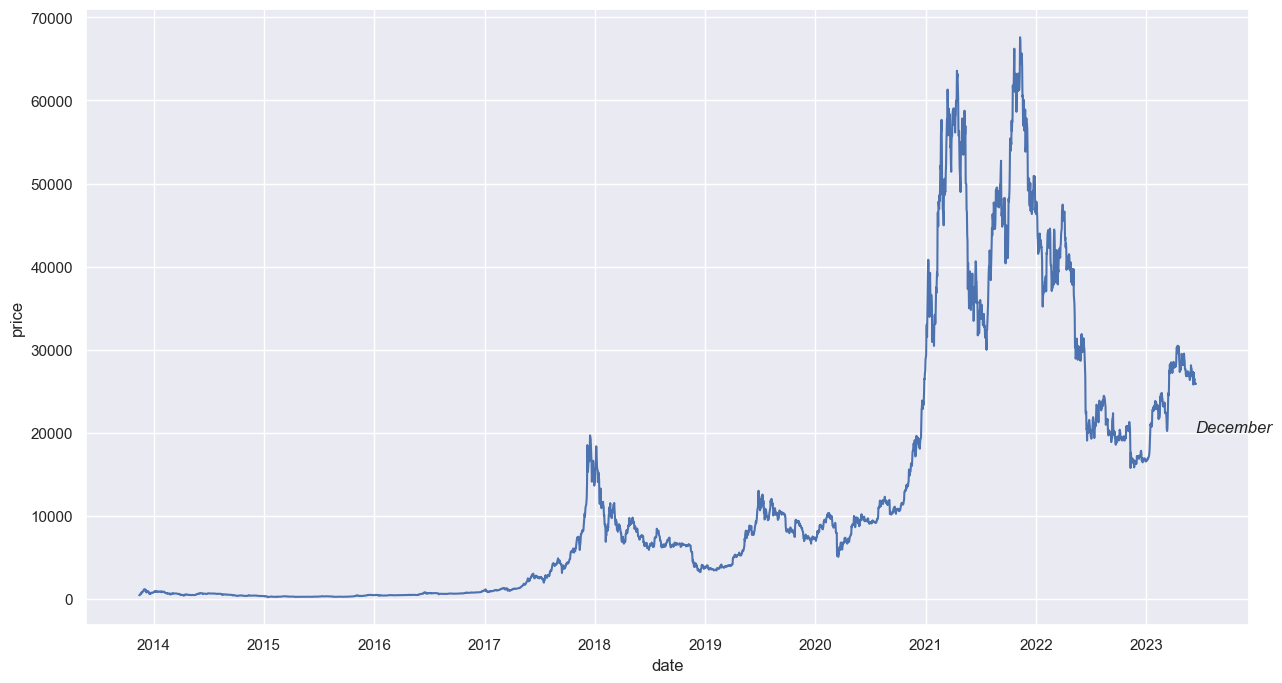

In [59]:
ax = sns.lineplot(x='date',y='price', data=btc_historical_prices)
ax.text(btc_historical_prices['date'].to_list()[-3], 20000, 'December', style='italic')


In [60]:
# Multiple lines on the same plot, very useful link here: 
# https://www.statology.org/seaborn-plot-multiple-lines/

In [61]:
btc_historical_prices.dtypes

date                 datetime64[ns]
price                       float64
market_cap                  float64
volume                      float64
coin                         object
price_sma_7                 float64
price_sma_30                float64
price_sma_90                float64
price_sma_180               float64
vol_sma_7                   float64
vol_sma_30                  float64
vol_sma_90                  float64
vol_sma_180                 float64
dev_price_sma_7             float64
dev_price_sma_30            float64
dev_price_sma_90            float64
dev_price_sma_180           float64
dev_vol_sma_7               float64
dev_vol_sma_30              float64
dev_vol_sma_90              float64
dev_vol_sma_180             float64
dtype: object

In [62]:
# IMP: I will need to make observations over bigger periods of time and/or different periods of time #

## Algo v0.1: An initial attempt at a simple algo to get some ideas
### I have explored this further later where I develop these ideas further

<Axes: >

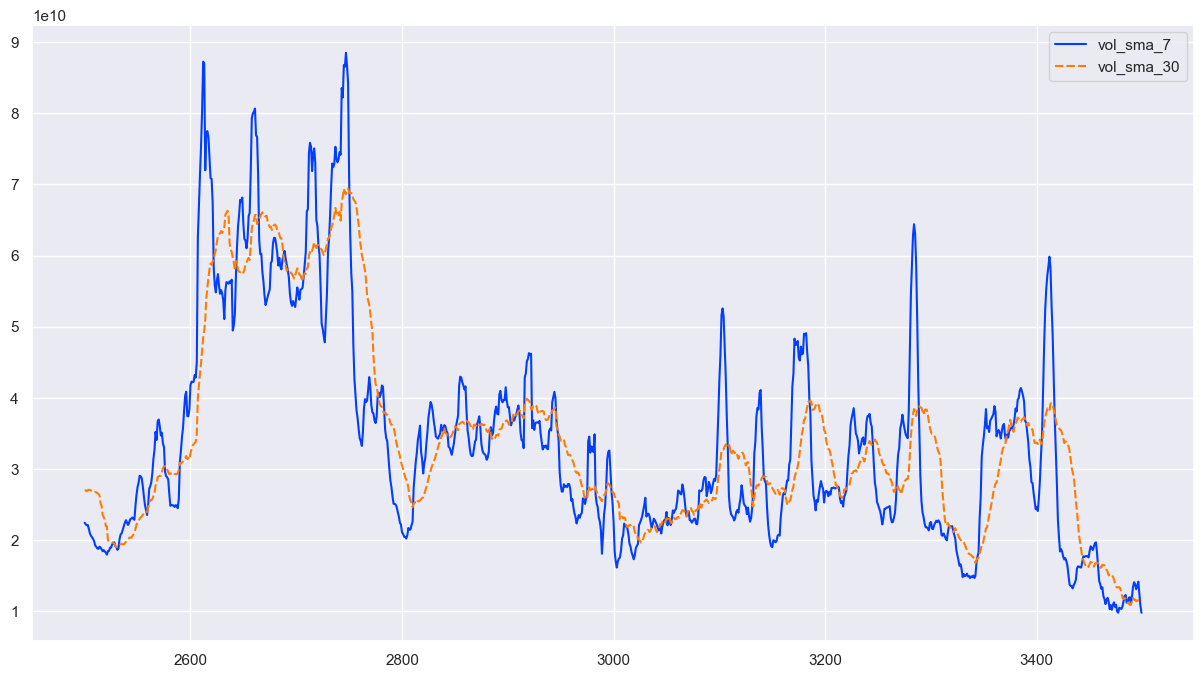

In [63]:
sns.lineplot(data=btc_historical_prices[['date','vol_sma_7','vol_sma_30']].tail(1000),palette='bright')

## Observations from the above and below charts
- Volume is MUCH more volatile than price 
- Since we are interested in higher time frame trades, it seems more useful to only look at SMAs as they smooth out the curve
- Deviation between 7-day and 30-day SMA of volumes seems to strongly predict whats going to happen
- Size of deviation seems to provide confidence/predict size of the move
- WHEN STUFF GOES UP, then 7-day vol moves significantly above 30-day vol and stays there, this is pretty strong and slightly predictive

- WHEN STUFF GOES DOWN, then 1. There is a large increase in 7-day vol compated to 30-day vol, followed by it going much lower the PRICE follows this pattern by a few days 


<Axes: >

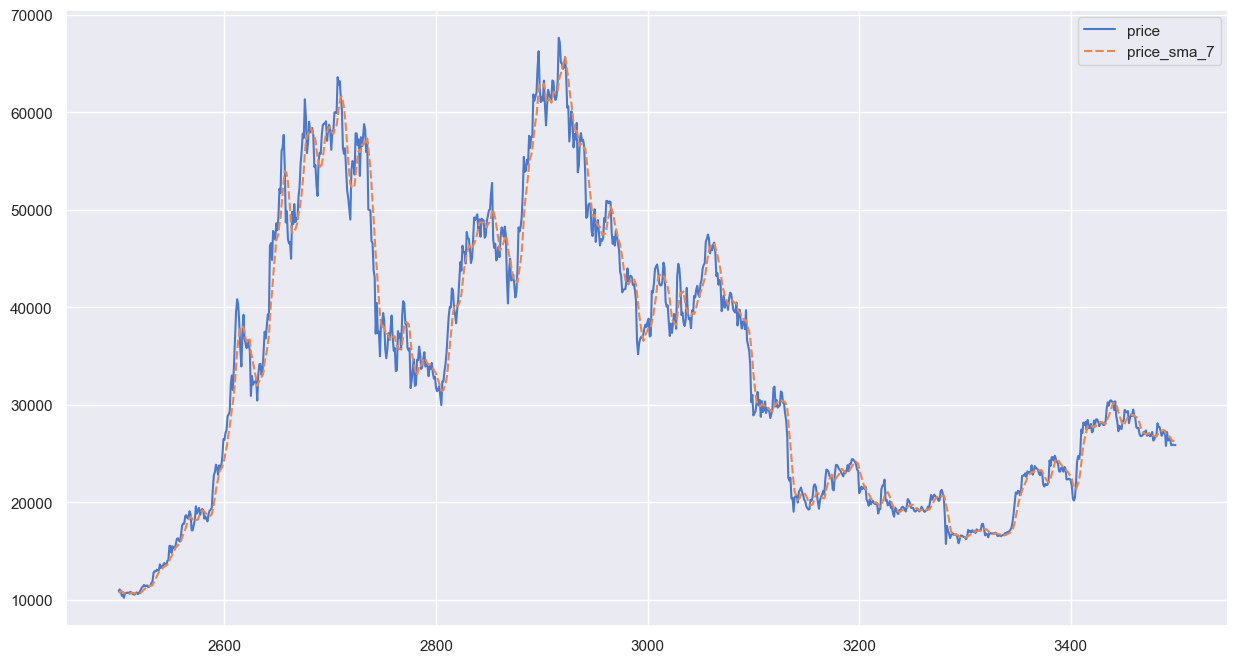

In [64]:
sns.lineplot(data=btc_historical_prices[['date','price','price_sma_7']].tail(1000),palette='muted')

<Axes: >

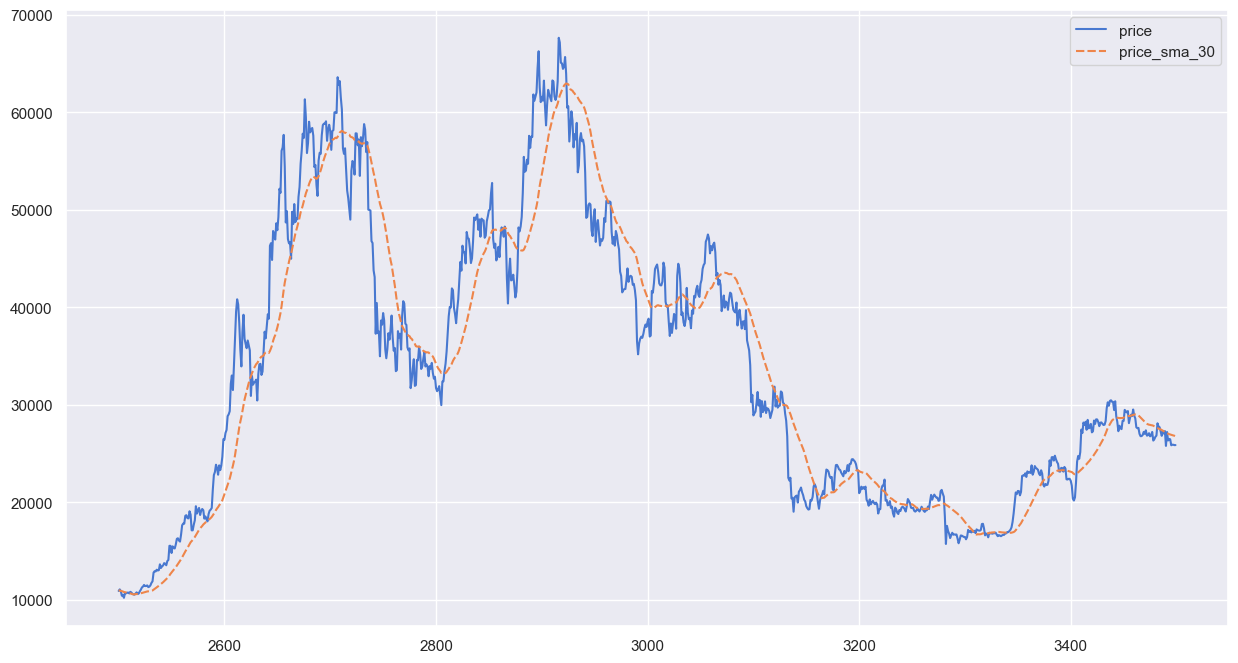

In [65]:
sns.lineplot(data=btc_historical_prices[['date','price','price_sma_30']].tail(1000),palette='muted')

<Axes: >

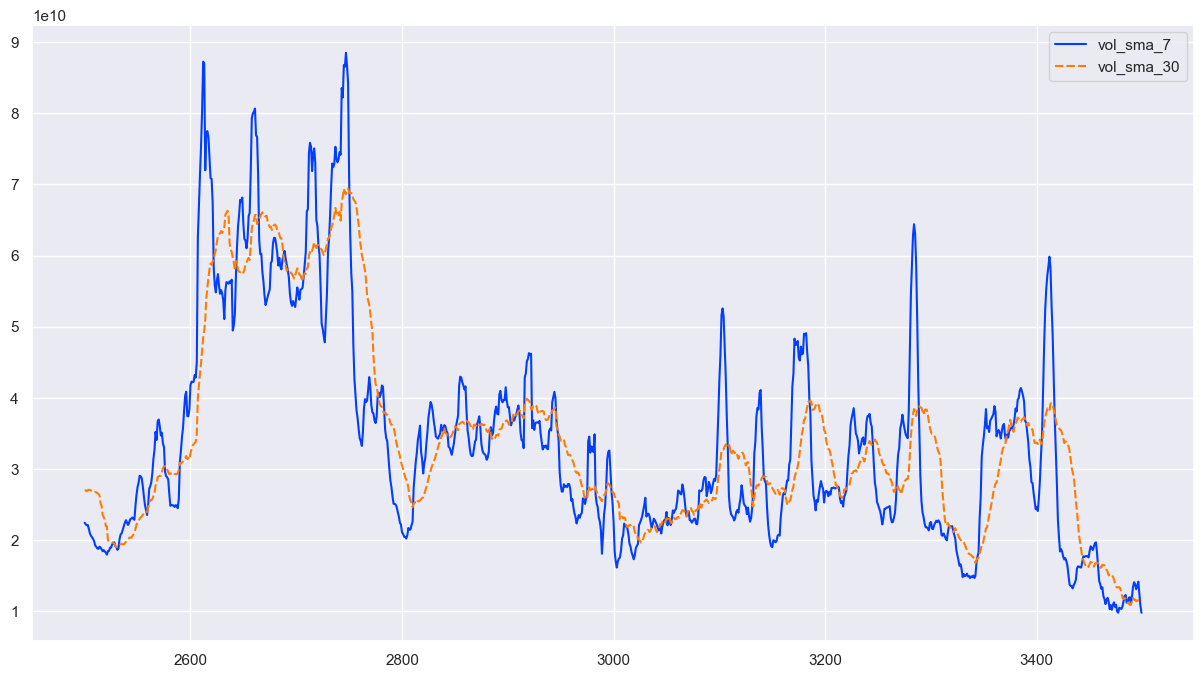

In [66]:
sns.lineplot(data=btc_historical_prices[['date','vol_sma_7','vol_sma_30']].tail(1000),palette='bright')

## Observations from above 2 and the below graphs 
- WHEN STUFF GOES UP then 30-day vol is significantly up than 7-day vol AND 7-day price is above 30-day price significantly too (say 10%)
- WHEN STUFF goes down then 30-day vol is significantly higher than 7-day and 7-day price is signficantly (Say 10%) lower than 30-day price


<Axes: >

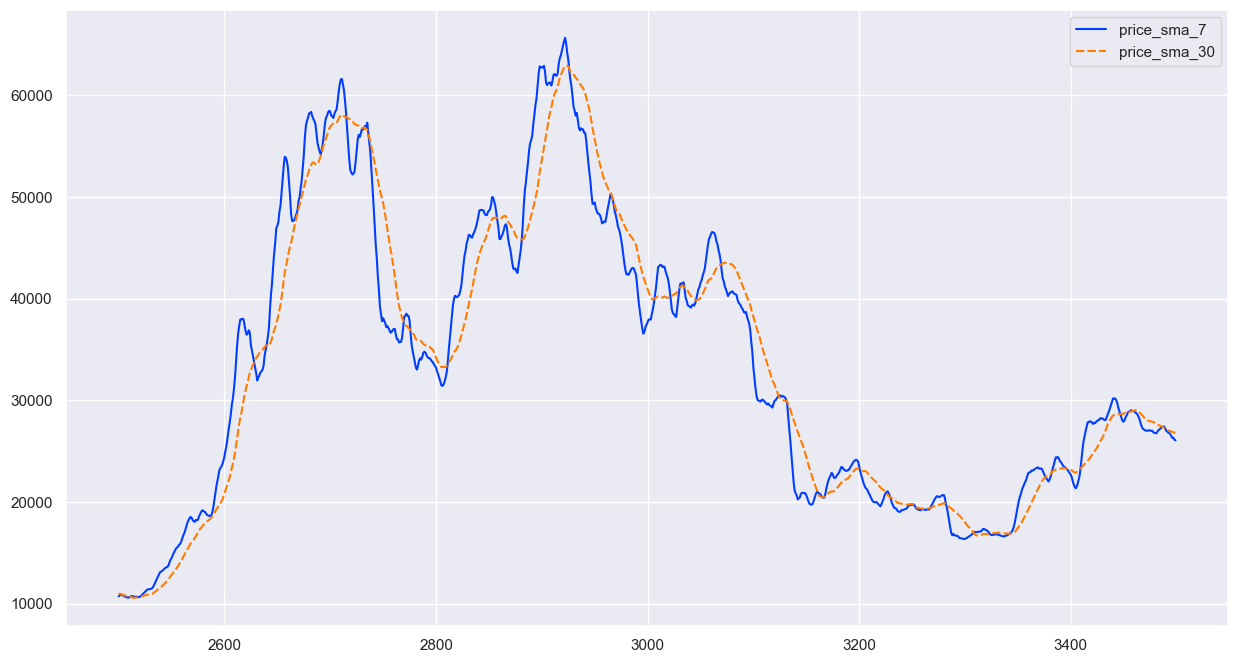

In [67]:


sns.lineplot(data=btc_historical_prices[['date','price_sma_7','price_sma_30']].tail(1000),palette='bright')


# A simple algorithm could be:

1. When 7-day vol is above a threshold (say 25%) than 30-day vol and 7-day price is above another threshold (say 10%) (i.e. trending up) then BUY 
2. When 7-day vol threshold is above another threshold (say 25%) above 30-day vol and 7-day price is below another thresold, say 10% (i.e.price is trending down) then SELL
3. 7-day vol going siginifcantly lower than 30-day will confirm the bearish trend
4. Similarly 7-day prices consistently staying above 30-days confirms the bull trend


### Some ideas
- shall i consider having diff between sma7 and sma 30 values? and perhaps use them as a feature in the model?
- shall i consider having volaitility/std dev to come up with the thresholds to detect a signal?

### Ideas on designing the algorithm

## Signal
1. One function should simply return whether we should buy or sell or do nothing on a given date
2. LATER I can add functionality that will help with sizing/confidence. Perhaps it will be best to keep asset allocation and risk management out of this piece, as that could be more global and this could just give us the signal, confidence level and perhaps an indication of size of the move

### Backtesting 
1. Perhaps I can just calculate the price on the day of entry and then at exit, and cal the % gain and use that as the metric to be optimised as well. Later I can think about making this much more sophisiticated I suppose, but in the beginning this shoudl suffice 

### Designing 
1. I must explore if there were ways of visualising the signals and deviations i.e. the workigns of the algo
2. I can try and do some initial adjustments to the thresholds and backtest and refine 
3. Once a basic and not very scary initial algo is made, I will move to actually executing trades and using the Kraken API to start doing so 
4. Later I will conitnue to work on making the basic algo more sophisticated, performant and better technically designed (e.g. running on a server, broken up into components, etc.)
5. I am first going to get a basic version working i.e. deploying actual money, before moving on to making it better

### Future
1. at some point, after the basic version is working, I will explore adding additional signals like coins moving onn/off exchange, signals from other coins, copy trading/wallet/blockhain analysis, tradfi signals, twitter sentiment, etc. to my algo 
2. Once I have had a few go s at teh algo my self, with raw thinking and Neha's help, then I will study existing materials and books to understand algo trading better 

## Designing the simple algorithm 
- this is for BTC at the moment, later I will add same thing for ETH as well 

### <font color='purple'> find out if I can visualise buy/sell signals on the chart </font>

In [68]:
### Showing annotations on the plot 

In [69]:
## generate a temp signal array 

In [70]:
# great link on finding no. of rows in a df
# https://stackoverflow.com/questions/15943769/how-do-i-get-the-row-count-of-a-pandas-dataframe
#del(temp)
temp = [None]*len(btc_historical_prices.index)
temp

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [71]:
# great link on generating a given no. of rand integers from a given sample 
# https://pynative.com/python-random-randrange/ 
for i in random.sample(range(0,3500),25):
    temp[i]='BUY'
    
for i in random.sample(range(0,3500),25):
    temp[i]='SELL'
    
temp


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 'SELL',
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 'SELL',
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 N

In [72]:
len(btc_historical_prices.index)

3500

In [73]:
btc_historical_prices['temp_signal'] = temp


In [74]:
# 2 neat ways of filtering on non-empty rows for a given column
#https://stackoverflow.com/questions/39475566/python-pandas-filter-out-records-with-null-or-empty-string-for-a-given-field 
btc_historical_prices[~btc_historical_prices.temp_signal.isnull()]

,date,price,market_cap,volume,coin,price_sma_7,price_sma_30,price_sma_90,price_sma_180,vol_sma_7,...,vol_sma_180,dev_price_sma_7,dev_price_sma_30,dev_price_sma_90,dev_price_sma_180,dev_vol_sma_7,dev_vol_sma_30,dev_vol_sma_90,dev_vol_sma_180,temp_signal
13,2013-11-27,914.130000,1.100942e+10,0.000000e+00,btc,790.011429,NaN,NaN,NaN,0.000000e+00,...,NaN,0.157110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SELL
105,2014-02-27,586.280000,7.300959e+09,3.821900e+07,btc,570.287143,685.025333,782.464222,NaN,5.627361e+07,...,NaN,0.028044,-0.144148,-0.250726,NaN,-0.320836,-0.134336,0.347607,NaN,SELL
160,2014-04-23,487.525000,6.231921e+09,8.412033e+06,btc,490.936000,477.136187,602.976318,NaN,1.687326e+07,...,NaN,-0.006948,0.021773,-0.191469,NaN,-0.501458,-0.713635,-0.739266,NaN,BUY
183,2014-05-16,445.165000,5.725218e+09,5.292981e+06,btc,442.706429,455.067423,520.982103,664.393774,6.693314e+06,...,2.345279e+07,0.005554,-0.021760,-0.145527,-0.329968,-0.209214,-0.578815,-0.784123,-0.774313,BUY
369,2014-11-18,374.868300,5.066664e+09,1.094406e+08,btc,393.321414,359.333170,406.245823,501.025394,1.848776e+08,...,4.765207e+07,-0.046916,0.043233,-0.077238,-0.251798,-0.408037,0.501442,1.400200,1.296661,BUY
429,2015-01-17,199.491400,2.740019e+09,1.064315e+08,btc,220.712124,286.428481,335.257158,405.090400,1.634692e+08,...,5.617576e+07,-0.096147,-0.303521,-0.404960,-0.507539,-0.348920,0.018759,0.268275,0.894616,BUY
440,2015-01-29,232.532942,3.203612e+09,1.619716e+08,btc,247.133135,254.647980,320.390414,383.213654,2.083297e+08,...,6.558723e+07,-0.059078,-0.086846,-0.274220,-0.393203,-0.222523,0.157351,0.614837,1.469560,SELL
447,2015-02-05,216.913600,2.994172e+09,7.414217e+07,btc,225.883071,238.133230,312.159496,369.197848,1.000382e+08,...,6.903425e+07,-0.039708,-0.089108,-0.305119,-0.412473,-0.258862,-0.469270,-0.295095,0.073991,BUY
663,2015-09-09,237.945200,3.472697e+09,5.599305e+07,btc,236.071714,238.345318,257.692745,248.644344,5.742144e+07,...,6.570215e+07,0.007936,-0.001679,-0.076632,-0.043030,-0.024876,-0.251372,-0.141288,-0.147774,BUY
768,2015-12-23,442.821000,6.640942e+09,9.559491e+08,btc,448.619714,405.574667,330.737774,293.382522,1.119972e+09,...,3.219097e+08,-0.012926,0.091836,0.338888,0.509364,-0.146452,-0.164611,0.655401,1.969619,SELL


In [75]:
btc_historical_prices.temp_signal.unique()

array([None, 'SELL', 'BUY'], dtype=object)

In [77]:
# using enumerate to grab indexes and signals from btc historical prices df 
# we will actually use iterrows as thats a pandas specific way to do it and makes is much much easier for our case
# since we want to do this on .tail(1000) elements only 
for (i,signal) in enumerate(btc_historical_prices.temp_signal):
    if (signal != None):
        print(btc_historical_prices.date[i], btc_historical_prices.price[i], signal)

2013-11-27 00:00:00 914.13 SELL
2014-02-27 00:00:00 586.28 SELL
2014-04-23 00:00:00 487.525 BUY
2014-05-16 00:00:00 445.165 BUY
2014-11-18 00:00:00 374.8683 BUY
2015-01-17 00:00:00 199.4914 BUY
2015-01-29 00:00:00 232.5329422304941 SELL
2015-02-05 00:00:00 216.9136 BUY
2015-09-09 00:00:00 237.9452 BUY
2015-12-23 00:00:00 442.821 SELL
2016-02-11 00:00:00 377.058 SELL
2016-05-05 00:00:00 448.9219999999999 SELL
2016-06-02 00:00:00 538.832 BUY
2016-06-12 00:00:00 671.7122784950529 SELL
2016-07-20 00:00:00 670.8934740599931 SELL
2017-07-02 00:00:00 2518.54569431263 BUY
2017-09-03 00:00:00 4632.46233076675 BUY
2018-03-02 00:00:00 10859.5521943893 SELL
2018-06-17 00:00:00 6478.81592433021 SELL
2018-06-18 00:00:00 6418.85000188746 SELL
2018-07-30 00:00:00 8197.593575814208 BUY
2018-08-26 00:00:00 6736.036057516459 BUY
2018-09-15 00:00:00 6500.01225461663 BUY
2018-11-25 00:00:00 3895.8368129589876 SELL
2018-12-06 00:00:00 3751.691966395661 BUY
2018-12-07 00:00:00 3466.763863771732 SELL
2019-01-

In [76]:
# iterrows is a pandas provided iterator that returns the entire pandas dataframe row and helps us iterate
#over the df this way we dont have to worry about index of the dataframe. I was using enumerate, however, i also 
#wanted to manipulate tail(1000) elements only which was proving to be pretty difficult but iterrows is teh natural
#way of doing it (suggested by Neha)
# here is a nice quick link on using iterrows: 
# https://stackoverflow.com/questions/16476924/how-to-iterate-over-rows-in-a-dataframe-in-pandas 


for index, row in btc_historical_prices.iterrows():
    if (row['temp_signal'] != None):
        print(row['date'], row['price'], row['temp_signal'])

2013-11-27 00:00:00 914.13 SELL
2014-02-27 00:00:00 586.28 SELL
2014-04-23 00:00:00 487.525 BUY
2014-05-16 00:00:00 445.165 BUY
2014-11-18 00:00:00 374.8683 BUY
2015-01-17 00:00:00 199.4914 BUY
2015-01-29 00:00:00 232.5329422304941 SELL
2015-02-05 00:00:00 216.9136 BUY
2015-09-09 00:00:00 237.9452 BUY
2015-12-23 00:00:00 442.821 SELL
2016-02-11 00:00:00 377.058 SELL
2016-05-05 00:00:00 448.9219999999999 SELL
2016-06-02 00:00:00 538.832 BUY
2016-06-12 00:00:00 671.7122784950529 SELL
2016-07-20 00:00:00 670.8934740599931 SELL
2017-07-02 00:00:00 2518.54569431263 BUY
2017-09-03 00:00:00 4632.46233076675 BUY
2018-03-02 00:00:00 10859.5521943893 SELL
2018-06-17 00:00:00 6478.81592433021 SELL
2018-06-18 00:00:00 6418.85000188746 SELL
2018-07-30 00:00:00 8197.593575814208 BUY
2018-08-26 00:00:00 6736.036057516459 BUY
2018-09-15 00:00:00 6500.01225461663 BUY
2018-11-25 00:00:00 3895.8368129589876 SELL
2018-12-06 00:00:00 3751.691966395661 BUY
2018-12-07 00:00:00 3466.763863771732 SELL
2019-01-

### Adding annotations to plot

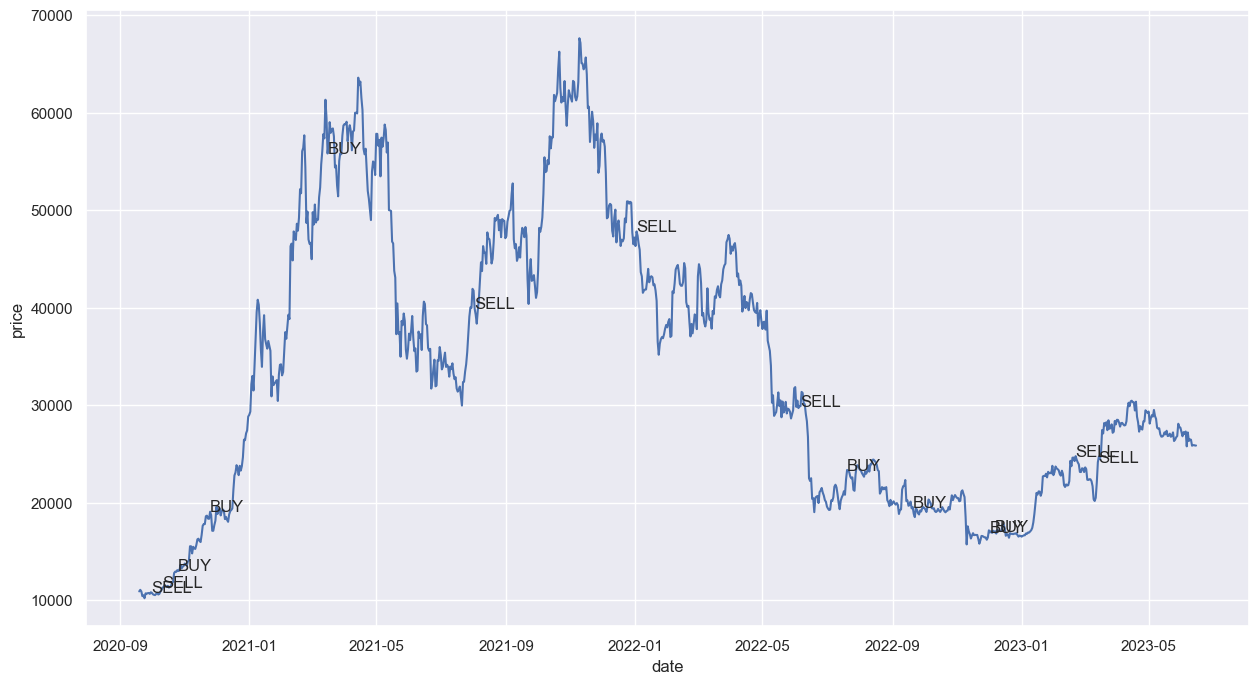

In [92]:
# https://www.geeksforgeeks.org/how-to-add-text-to-matplotlib/
# good link on adding text and annotations to plots
sns.lineplot(x='date',y='price',data=btc_historical_prices[['date','price','price_sma_30']].tail(1000))

for index, row in btc_historical_prices.tail(1000).iterrows():
    if (row['temp_signal'] != None):
        plt.text(row['date'], row['price'], row['temp_signal'])

#plt.show()


### Figuring out how to plot multiple lines on the same plot 

In [81]:
## METHOD1: Add multiple plots. PROs: easy syntax, easy to understanding, no melting needed CONS: legend and labeling

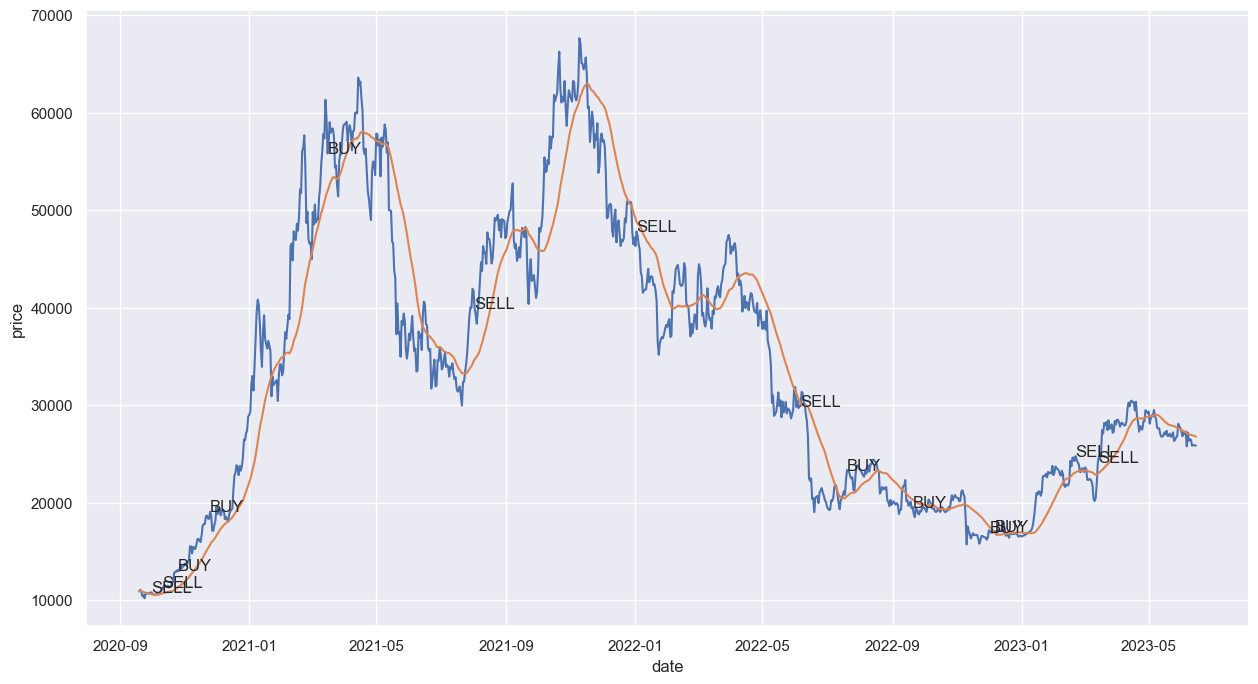

In [82]:

sns.lineplot(x='date', y='price',data=btc_historical_prices[['date','price','price_sma_30']].tail(1000))

sns.lineplot(x='date', y='price_sma_30',data=btc_historical_prices[['date','price','price_sma_30']].tail(1000))

for index, row in btc_historical_prices.tail(1000).iterrows():
    if (row['temp_signal'] != None):
        plt.text(row['date'], row['price'], row['temp_signal'])

In [83]:
## MEthOD2: Usign melt function PROS: axes, legend, etc. easy and natural CONS: unneccessary manipulation of data to fit a plotting library 

In [84]:
# plotting several lines on the same plot, trying to use melt function to do this 
# info at the end of this link: https://www.statology.org/seaborn-plot-multiple-lines/
data=pd.melt(btc_historical_prices[['date','price','price_sma_30']].tail(10), ['date'])
data

,date,variable,value
0,2023-06-06 00:00:00,price,25792.616090
1,2023-06-07 00:00:00,price,27216.615565
2,2023-06-08 00:00:00,price,26346.244545
3,2023-06-09 00:00:00,price,26507.909892
4,2023-06-10 00:00:00,price,26469.581684
5,2023-06-11 00:00:00,price,25858.122892
6,2023-06-12 00:00:00,price,25916.579896
7,2023-06-13 00:00:00,price,25910.362743
8,2023-06-14 00:00:00,price,25872.206459
9,2023-06-14 18:42:33,price,25876.030215


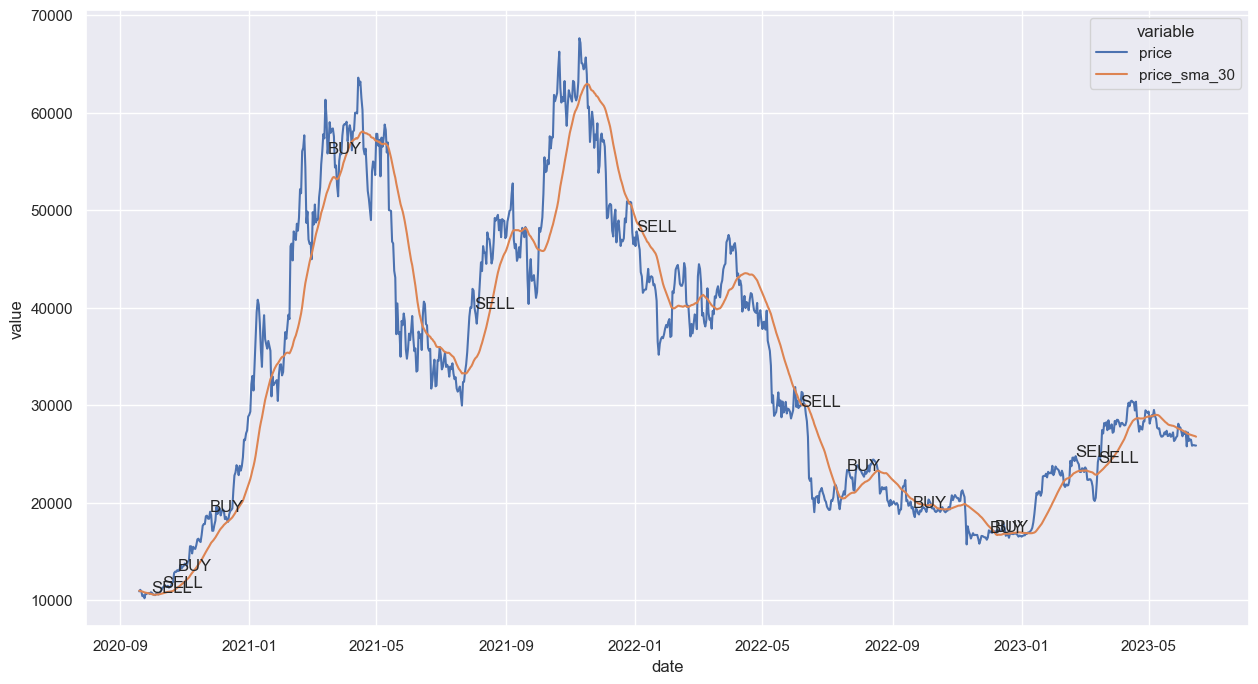

In [85]:

sns.lineplot(x='date',y='value',data=pd.melt(btc_historical_prices[['date','price','price_sma_30']].tail(1000), ['date']),hue='variable')

for index, row in btc_historical_prices.tail(1000).iterrows():
    if (row['temp_signal'] != None):
        plt.text(row['date'], row['price'], row['temp_signal'])

In [86]:
##Method 3, provide all rows as a single data frame PROs: no melting needed   CONS: x-axis is screwed; its a sequence rather than dates
# not going to use this one as cant annotate text and hard to interpret

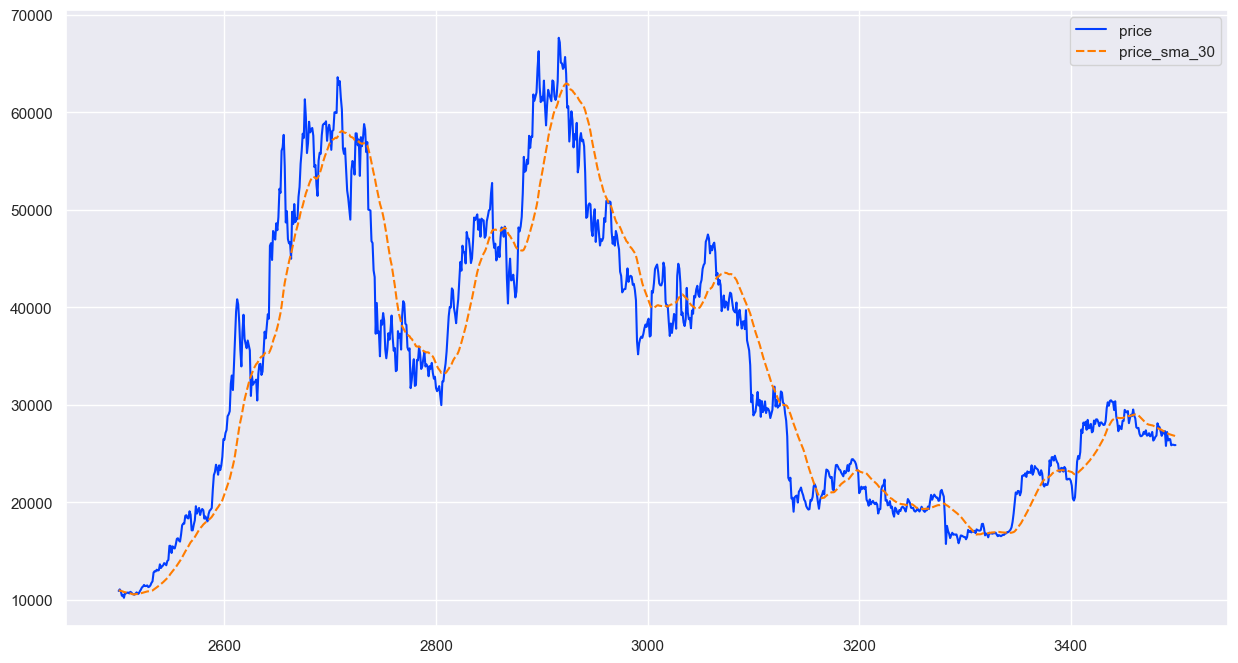

In [91]:
sns.lineplot(data=btc_historical_prices[['date','price','price_sma_30']].tail(1000),palette='bright')
#for index, row in btc_historical_prices.tail(1000).iterrows():
 #   if (row['temp_signal'] != None):
  #      plt.text(row['date'], row['price'], row['temp_signal'])
# X axis is fucked which is likely the reason I cant print text annotations as date is not really the x axis here!!
plt.show()

In [ ]:
##Method 4: OLD school, use matplotlib
# for laters, If time permits, not a priority as I already found 2 useful methods!

### Visualising the % deviations on the chart 

#### plotting 2 axes on a plot 
good quick link for this: https://stackoverflow.com/questions/47591650/second-y-axis-time-series
basically create and use another axis


<Axes: xlabel='date', ylabel='dev_price_sma_30'>

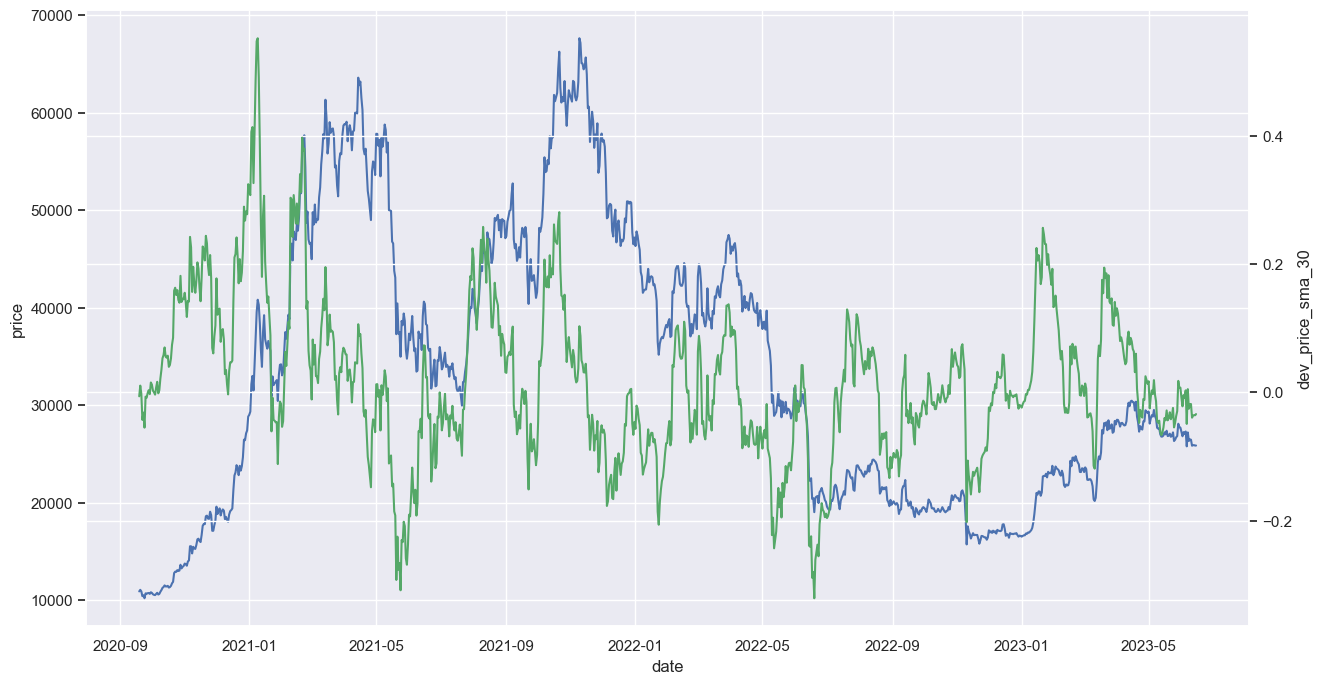

In [102]:
sns.lineplot(x='date', y='price',
             data=btc_historical_prices[['date','price','price_sma_30']].tail(1000),color='b')
ax2=plt.twinx() #this does the magic
sns.lineplot(x='date', y='dev_price_sma_30',
              data=btc_historical_prices[['date','dev_price_sma_7','dev_price_sma_30']].tail(1000),color='g',ax=ax2)

#### plotting deviations on the chart 

<Axes: xlabel='date', ylabel='dev_vol_7_30'>

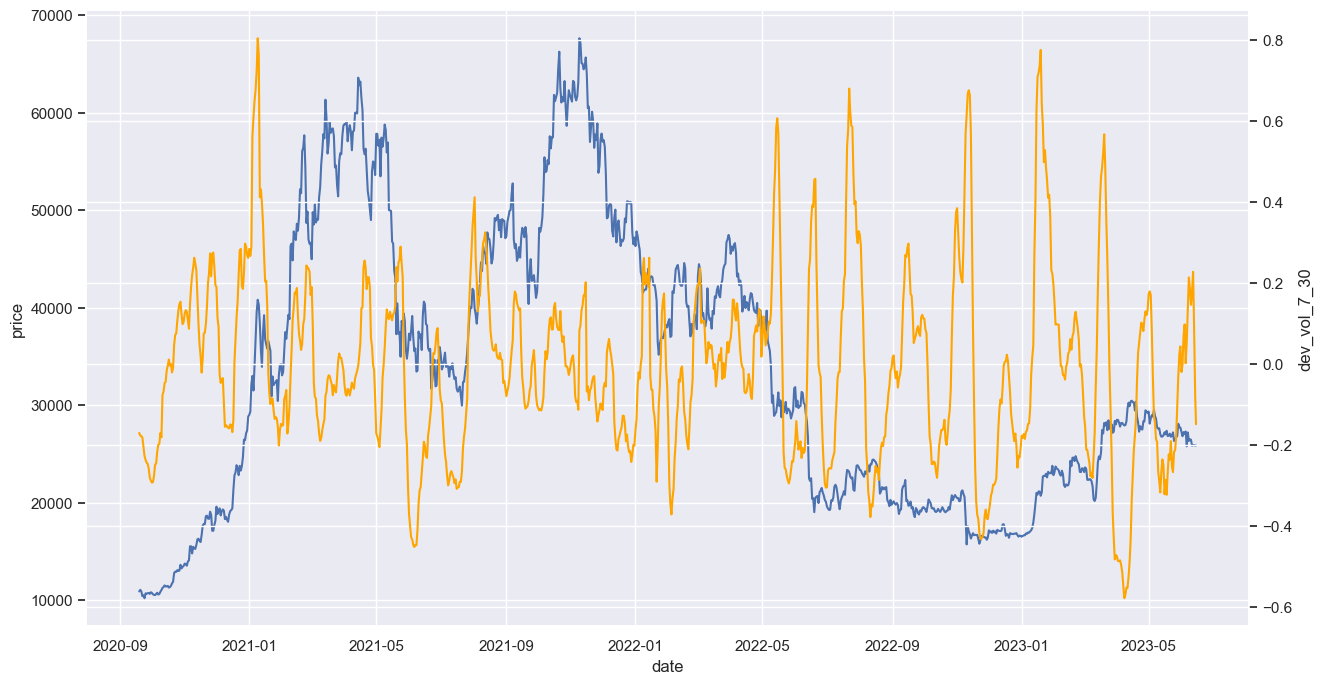

In [112]:
sns.lineplot(x='date', y='price',
             data=btc_historical_prices[['date','price','price_sma_30']].tail(1000),color='b')
ax2=plt.twinx() 
sns.lineplot(x='date', y='dev_vol_7_30',
              data=btc_historical_prices[['date','dev_vol_7_30','dev_price_sma_30']].tail(1000),color='orange',ax=ax2)

In [119]:
btc_historical_prices.describe()

,date,price,market_cap,volume,price_sma_7,price_sma_30,price_sma_90,price_sma_180,vol_sma_7,vol_sma_30,...,vol_sma_180,dev_price_sma_7,dev_price_sma_30,dev_price_sma_90,dev_price_sma_180,dev_vol_sma_7,dev_vol_sma_30,dev_vol_sma_90,dev_vol_sma_180,dev_vol_7_30
count,3500,3500.000000,3.499000e+03,3.500000e+03,3494.000000,3471.000000,3411.000000,3321.000000,3.494000e+03,3.471000e+03,...,3.321000e+03,3494.000000,3471.000000,3411.000000,3321.000000,3457.000000,3457.000000,3411.000000,3321.000000,3457.000000
mean,2018-08-30 08:59:41.530000128,12377.020013,2.297450e+11,1.494209e+10,12375.632978,12366.307573,12331.224196,12312.649701,1.495971e+10,1.501873e+10,...,1.519816e+10,0.003900,0.018055,0.061541,0.140560,0.017290,0.077790,0.151471,0.298090,0.045265
min,2013-11-14 00:00:00,172.147900,2.362640e+09,0.000000e+00,203.151300,224.437643,236.047097,242.357982,0.000000e+00,0.000000e+00,...,2.332002e+07,-0.345271,-0.432662,-0.495556,-0.582205,-0.987693,-0.993005,-0.994497,-0.992013,-0.978876
25%,2016-04-07 18:00:00,618.765632,9.003250e+09,3.568608e+08,621.168331,611.363993,605.922722,590.937093,4.117148e+08,4.510372e+08,...,9.575908e+08,-0.020410,-0.054608,-0.107181,-0.162911,-0.188287,-0.253289,-0.322782,-0.345418,-0.166960
50%,2018-08-30 12:00:00,6634.255847,1.147422e+11,4.372642e+09,6588.635741,6672.083238,6891.599290,7283.127813,4.369916e+09,4.433328e+09,...,3.909559e+09,0.002433,0.008574,0.018189,0.070562,-0.038201,-0.053749,-0.035873,-0.031527,-0.006434
75%,2021-01-21 06:00:00,18171.012347,3.345827e+11,2.525304e+10,18117.191216,17782.414080,18226.852481,19372.373183,2.614678e+10,2.718848e+10,...,2.922994e+10,0.029541,0.082279,0.201149,0.326961,0.143416,0.221760,0.383356,0.566605,0.203217
max,2023-06-14 18:42:33,67617.015545,1.278798e+12,1.788941e+11,65652.921591,62939.128266,56243.654655,50537.138808,8.849832e+10,6.941579e+10,...,5.950009e+10,0.444755,1.021754,1.893556,2.870716,6.000000,29.000000,54.103480,64.850223,3.285714
std,NaN,15741.239051,2.982744e+11,1.871954e+10,15725.521192,15666.615808,15463.811227,15146.208634,1.789616e+10,1.738169e+10,...,1.648632e+10,0.053288,0.127752,0.258935,0.426994,0.378939,0.870385,1.208223,1.566787,0.383383


### design a function along the lines of the algo that returns a buy/sell/do nothing on a given date

#### calculation for the buy signals

In [228]:
btc_historical_prices['signal'] = None # create a column for signal 
for index, row in btc_historical_prices.iterrows():
    if (row['dev_vol_7_30'] >=0.10 and row['dev_price_7_30'] >=0):
        btc_historical_prices.at[index,'signal'] ='BUY' #below is a good link on assigning a cell in pandas data frame
                                                         # https://www.geeksforgeeks.org/how-to-set-cell-value-in-pandas-dataframe/
# Will parametrise these thresholds and apply ML to find optimal ones later  

In [229]:
btc_historical_prices.loc[btc_historical_prices['signal']=='BUY']

,date,price,market_cap,volume,coin,price_sma_7,price_sma_30,price_sma_90,price_sma_180,vol_sma_7,...,dev_price_sma_90,dev_price_sma_180,dev_vol_sma_7,dev_vol_sma_30,dev_vol_sma_90,dev_vol_sma_180,temp_signal,dev_vol_7_30,signal,dev_price_7_30
51,2014-01-04,849.140000,1.035095e+10,3.634470e+07,btc,779.575714,769.410667,NaN,NaN,2.920593e+07,...,NaN,NaN,0.244429,2.690505,NaN,NaN,None,1.965622,BUY,0.013211
52,2014-01-05,919.410000,1.120754e+10,6.241460e+07,btc,807.138571,766.069000,NaN,NaN,3.426254e+07,...,NaN,NaN,0.821657,4.232327,NaN,NaN,None,1.872290,BUY,0.053611
53,2014-01-06,936.380000,1.141440e+10,8.858460e+07,btc,832.261429,770.215667,NaN,NaN,4.338647e+07,...,NaN,NaN,1.041756,4.952678,NaN,NaN,None,1.915469,BUY,0.080556
54,2014-01-07,826.500000,1.010768e+10,8.026810e+07,btc,842.452857,772.995333,NaN,NaN,5.172427e+07,...,NaN,NaN,0.551846,3.571838,NaN,NaN,None,1.946065,BUY,0.089855
55,2014-01-08,838.320000,1.025634e+10,7.806030e+07,btc,852.535714,771.009667,NaN,NaN,5.952594e+07,...,NaN,NaN,0.311366,2.872215,NaN,NaN,None,1.952810,BUY,0.105739
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3414,2023-03-22,28264.239611,5.459174e+11,3.443093e+10,btc,26940.982012,23838.002667,21657.368243,19990.188083,5.300406e+10,...,0.305063,0.413906,-0.350410,-0.121919,0.047229,0.115018,None,0.351745,BUY,0.130169
3415,2023-03-23,27449.254831,5.305152e+11,3.539483e+10,btc,27366.463837,23926.755630,21775.417851,20035.506694,4.904511e+10,...,0.260562,0.370030,-0.278321,-0.094564,0.070200,0.146256,None,0.254624,BUY,0.143760
3416,2023-03-24,28459.735114,5.495784e+11,2.036081e+10,btc,27837.672851,24061.500565,21905.065402,20088.394275,4.328408e+10,...,0.299231,0.416725,-0.529601,-0.469362,-0.385112,-0.340110,None,0.128057,BUY,0.156938
3455,2023-05-02,28125.501156,5.444217e+11,1.998017e+10,btc,28890.346813,28848.976890,25850.656718,22040.421452,1.956712e+10,...,0.087999,0.276087,0.021109,0.204284,-0.308032,-0.289910,None,0.179388,BUY,0.001434


<Axes: xlabel='date', ylabel='dev_vol_7_30'>

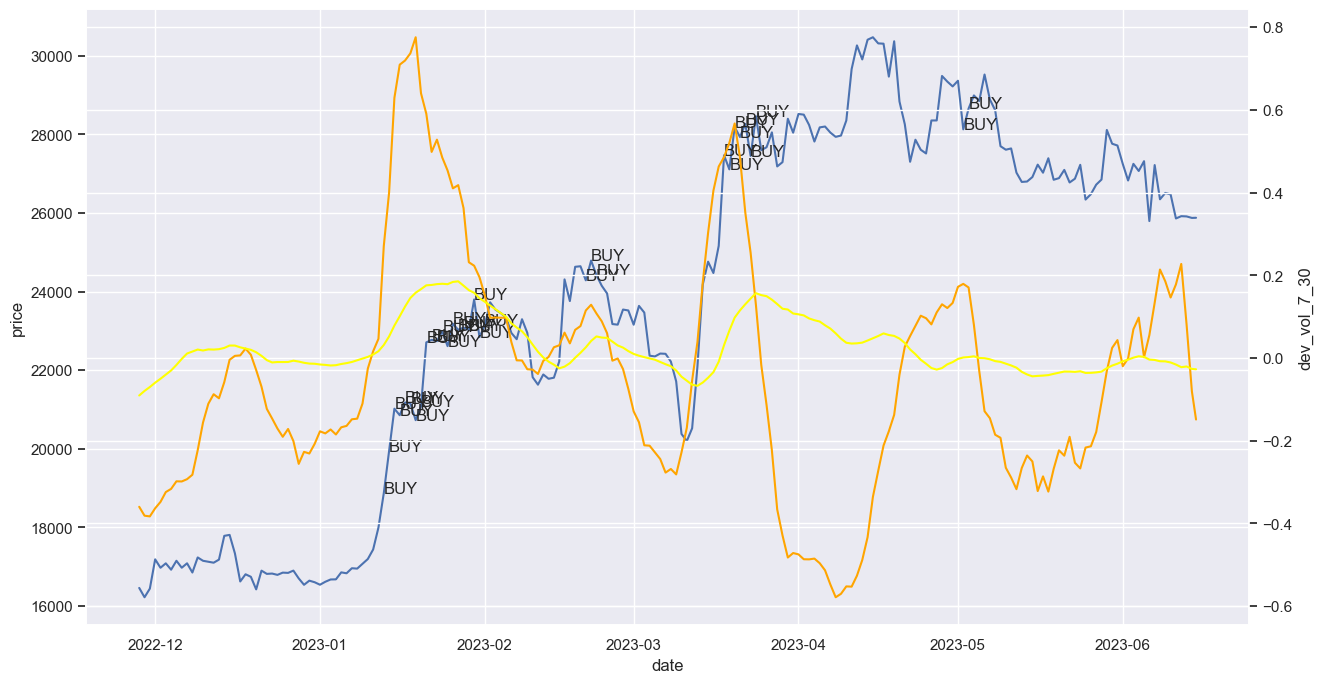

In [195]:

# plot signals and indicators for a given number of points from the tail
num_points=200

sns.lineplot(x='date', y='price',
             data=btc_historical_prices[['date','price','price_sma_30']].tail(num_points),color='b')


for index, row in btc_historical_prices.tail(200).iterrows():
    if (row['signal'] != None):
        plt.text(row['date'], row['price'], row['signal']) # doing this after declaring 2nd axis throws error!
        
ax2=plt.twinx() 
sns.lineplot(x='date', y='dev_vol_7_30',
              data=btc_historical_prices[['date','dev_vol_7_30','dev_price_sma_30']].tail(num_points),color='orange',ax=ax2)

sns.lineplot(x='date', y='dev_price_7_30',
              data=btc_historical_prices[['date','dev_price_7_30']].tail(num_points),color='yellow',ax=ax2)



<Axes: xlabel='date', ylabel='dev_vol_7_30'>

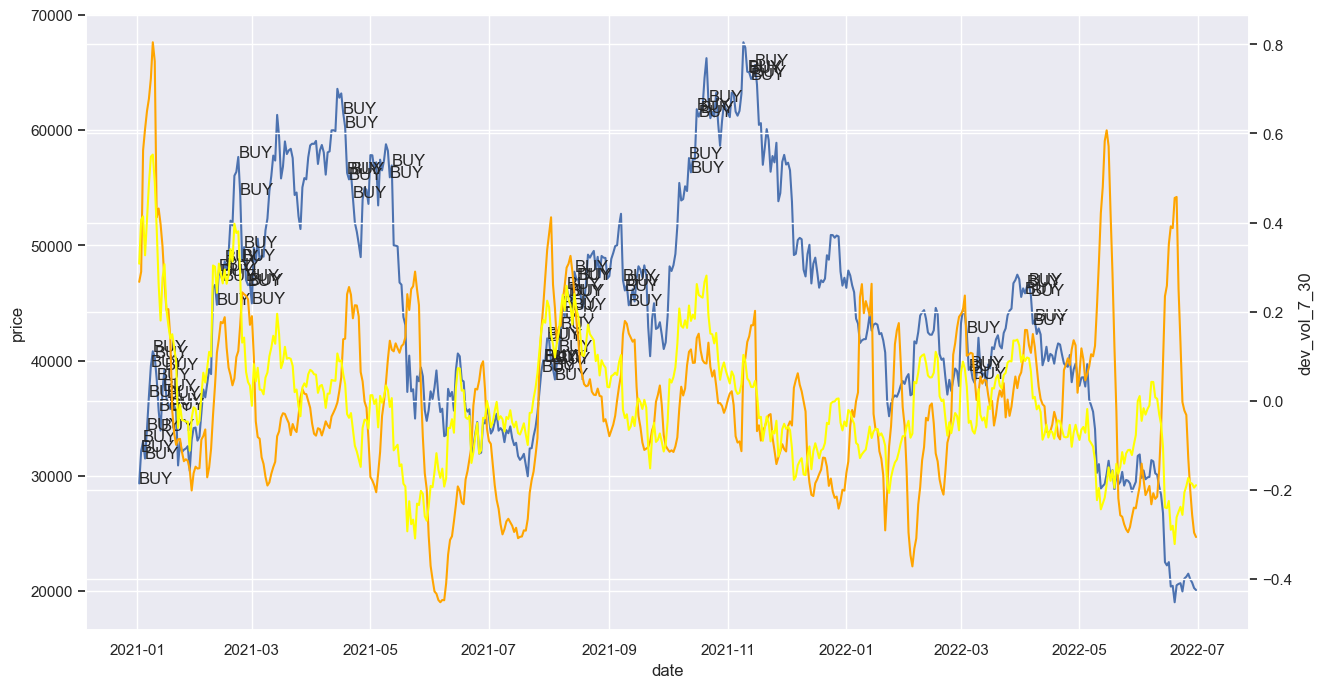

In [196]:
# plot signals and indicators for a given date range
in a given range of dates 

from_date= '2021-01-01' #datetime.datetime(2021, 1, 1)
to_date= '2022-07-01' #datetime.datetime(2022, 7, 1) #https://www.w3schools.com/python/gloss_python_date_create.asp creating datetime objects

plot_data=btc_historical_prices[(btc_historical_prices['date']>from_date) & (btc_historical_prices['date']<to_date) ]

sns.lineplot(x='date', y='price',
             data=plot_data[['date','price','price_sma_30']],color='b')


for index, row in plot_data.iterrows():
    if (row['signal'] != None):
        plt.text(row['date'], row['price'], row['signal'])
        

ax2=plt.twinx() 
sns.lineplot(x='date', y='dev_vol_7_30',
              data=plot_data[['date','dev_vol_7_30','dev_price_sma_30']],color='orange',ax=ax2)


sns.lineplot(x='date', y='dev_price_sma_30',
              data=plot_data[['date','dev_price_sma_30']],color='yellow',ax=ax2)



## Algo improvement notes on 18 June 2023 

* these will go into improving algo later. noting so that I dont forget* 

#### Adding a 7 day price signal to improve buy signal 
At the moment, I am only using 7 vs 30 day vol and price deviations as signals
a problem with that is that sometimes I am catching the peak of a down trend, to fix, this I can try using 
7 day price vs current price as a signal, if its negative dont give a buy signal, etc. At the moment, not doing this, as
I am going to cover this in the sell signal. But will revisit in a further iteration of algo 

#### Using ML to find optimal parameters
I can parametrise the thresholds nad use ML/gradient descent to find optimal parameters that maximise certain goals like
profitablity, good sharpe ratio, low drawdowns, etc. 

#### Add trend indicators
I noted that 7 day price being consistently below 30 day price and vol remaining low is bearish trend and high consistent volume and orice is bullish trend, later I will add a trend indicator to the model as well

#### Using the swing in signals
At the moment, I am not using the fact that the 7 vs30 day volume swings widly from negative to positive at the start of a bull trend
if I can capture this mathematically in my algo, *it seems to reliably predict an upcoing upswing*



In [ ]:
#### calculation for the sell signal

In [230]:
#btc_historical_prices['signal'] = None # create a column for signal 
for index, row in btc_historical_prices.iterrows():
    if (row['dev_vol_7_30'] >=0.10 and row['dev_price_sma_7'] <=0):
        btc_historical_prices.at[index,'signal'] ='SELL'

<Axes: xlabel='date', ylabel='dev_vol_7_30'>

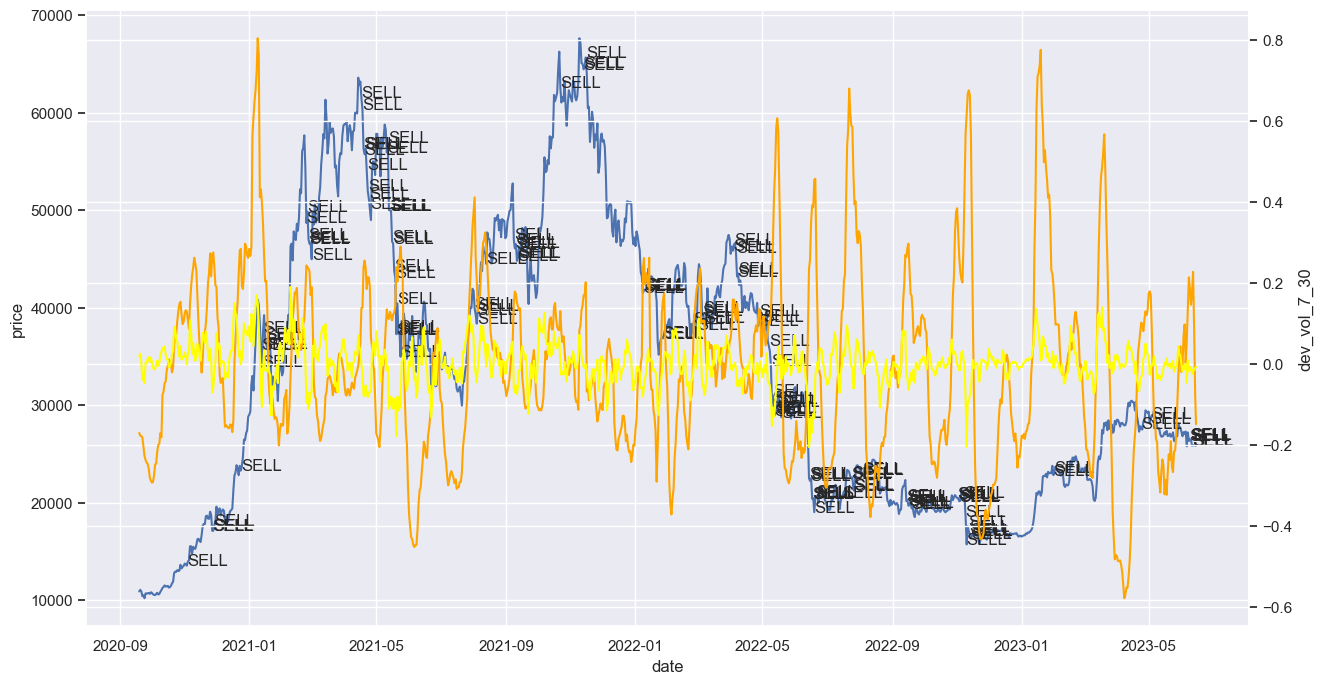

In [204]:

# plot signals and indicators for a given number of points from the tail
num_points=1000

sns.lineplot(x='date', y='price',
             data=btc_historical_prices[['date','price','price_sma_30']].tail(num_points),color='b')


for index, row in btc_historical_prices.tail(num_points).iterrows():
    if (row['signal'] != None):
        plt.text(row['date'], row['price'], row['signal']) # doing this after declaring 2nd axis throws error!
        
ax2=plt.twinx() 
sns.lineplot(x='date', y='dev_vol_7_30',
              data=btc_historical_prices[['date','dev_vol_7_30','dev_price_sma_30']].tail(num_points),color='orange',ax=ax2)

sns.lineplot(x='date', y='dev_price_sma_7',
              data=btc_historical_prices[['date','dev_price_sma_7']].tail(num_points),color='yellow',ax=ax2)

<Axes: xlabel='date', ylabel='dev_vol_7_30'>

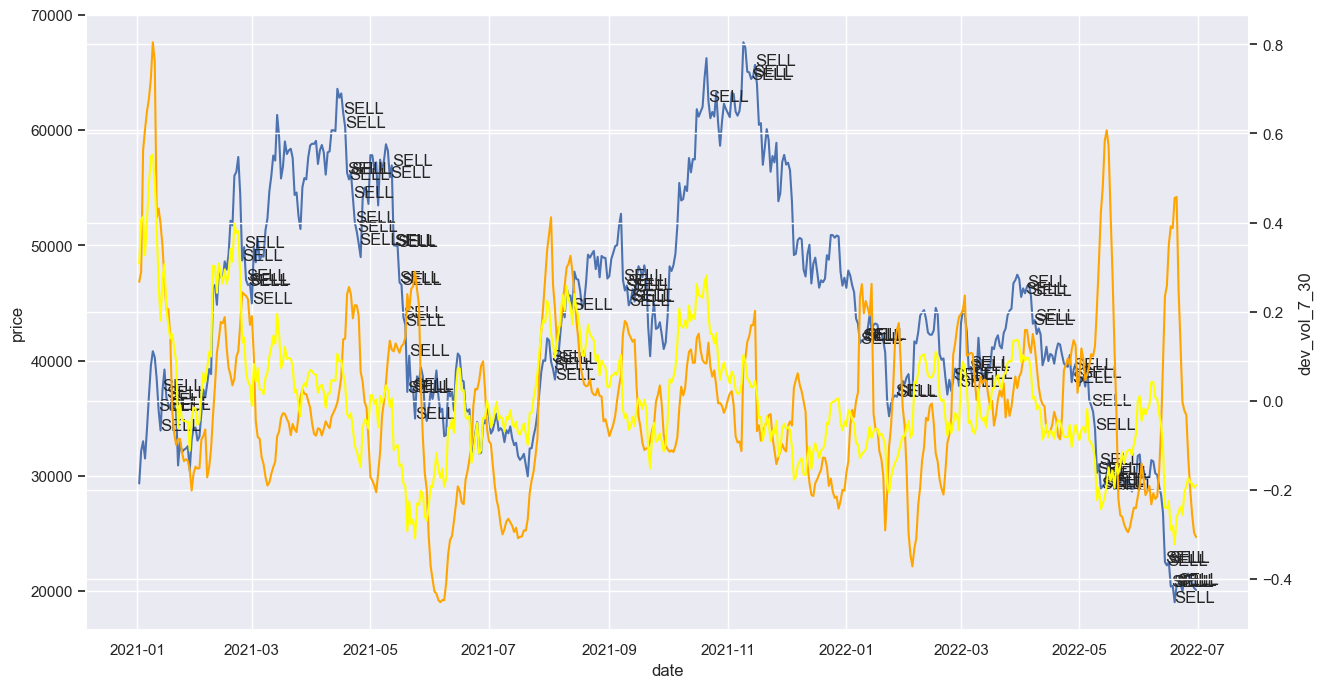

In [206]:
# plot signals and indicators for a given date range in a given range of dates 

from_date= '2021-01-01' #datetime.datetime(2021, 1, 1)
to_date= '2022-07-01' #datetime.datetime(2022, 7, 1) #https://www.w3schools.com/python/gloss_python_date_create.asp creating datetime objects

plot_data=btc_historical_prices[(btc_historical_prices['date']>from_date) & (btc_historical_prices['date']<to_date) ]

sns.lineplot(x='date', y='price',
             data=plot_data[['date','price','price_sma_30']],color='b')


for index, row in plot_data.iterrows():
    if (row['signal'] != None):
        plt.text(row['date'], row['price'], row['signal'])
        

ax2=plt.twinx() 
sns.lineplot(x='date', y='dev_vol_7_30',
              data=plot_data[['date','dev_vol_7_30','dev_price_sma_30']],color='orange',ax=ax2)


sns.lineplot(x='date', y='dev_price_sma_30',
              data=plot_data[['date','dev_price_sma_30']],color='yellow',ax=ax2)

### Cleanup the signals 


<i>clean up the signals so that they represent trade recommendations, i.e. a single buy, followed by a sell</i>

1.  create functions or isBuyorSell() that returns whether there is a buy of a sell signal on a given date
2.  as soon as I see a BUY signal, call a 'trade' function that takes buy date as the input and returns the sell date, it also adds these on the data frame 
    the function will check isBuyorSell() from buy date+1, until it encounters a sell, upon which it will register the signal on DF and return the sell date to the calling function 
3. then we start the above function from the next date after the previous trade 

In [348]:
def isBuyorSell(date):
    return (btc_historical_prices[btc_historical_prices.date==date]['signal'].iloc[0]) # tested OK (temp comment)

In [351]:
# set buy date as the date passed and keep scanning until I find a sell, then record it and return the sell date

def create_trade(date):
    sell_date=date # just declaring it so that its scope it bigger and I can use it for return statement
    btc_historical_prices.loc[btc_historical_prices.date ==date,'trade_reco'] ='BUY'
    
    for date in btc_historical_prices.date:
        if (isBuyorSell(date)=='SELL'):
            btc_historical_prices.loc[btc_historical_prices.date ==date,'trade_reco'] ='SELL'
            sell_date=date
            print('breaking now')
            break # if SELL found, break the loop
    return sell_date

In [352]:
start_date= btc_historical_prices.loc[0]['date']

for date in btc_historical_prices['date'] : ### IMP: (check with Neha)should I sort the dates in case they are not in order in DF?
    if (date<=start_date):
        continue # skip the code below if this date was already scanned for a trade signal
    elif (isBuyorSell(date)=='BUY'):
        start_date=create_trade(date) # record the trade and scan next 
        

KeyboardInterrupt: 

# <font color='red'>To Dos </font>
As a learning point from the above epxdrience, I will do a pandas tutorial, perhaps the 10 mins to pandas and/or the data camp
tutorial and/or the public student data set notebook + specially focuse on fetching, setting, iterating and creating a dataframe
+ notes onthe same to make the most of this experience. 
However, I will finish visualising a basic version of the algo first!

In [ ]:
### rough work

In [353]:
create_trade('2014-01-04')

'2014-01-04'

In [359]:
if (isBuyorSell('2014-01-07')=='SELL'):
    btc_historical_prices.loc[btc_historical_prices.date ==date,'trade_reco'] ='SELL'
    sell_date=date
    print('breaking now')
else :
    print ('not found')
        


not found


In [345]:
btc_historical_prices[btc_historical_prices.date=='2014-01-07']['signal'].iloc[0]

'BUY'

In [ ]:
for date in btc_historical_prices['date'].to_list():
    print(date)
   

In [ ]:
# testing create_trade

In [344]:
isBuyorSell('2014-01-07')

'BUY'

In [257]:
 '2022-07-01'] 

,date,price,market_cap,volume,coin,price_sma_7,price_sma_30,price_sma_90,price_sma_180,vol_sma_7,...,dev_price_sma_180,dev_vol_sma_7,dev_vol_sma_30,dev_vol_sma_90,dev_vol_sma_180,temp_signal,dev_vol_7_30,signal,dev_price_7_30,trade_reco
3151,2022-07-02 00:00:00,19407.447430,3.709165e+11,2.875678e+10,btc,20391.011452,24045.439160,32080.088055,36689.639462,1.996328e+10,...,-0.471037,0.440483,0.062617,0.018985,0.111790,None,-0.262319,None,-0.151980,NaN
3152,2022-07-03 00:00:00,19268.227003,3.677067e+11,1.560172e+10,btc,20068.489544,23671.679593,31778.239877,36538.178830,1.988461e+10,...,-0.472655,-0.215387,-0.417293,-0.445871,-0.395993,None,-0.257331,None,-0.152215,NaN
3153,2022-07-04 00:00:00,19310.233219,3.685494e+11,1.397697e+10,btc,19819.550661,23324.882584,31474.768738,36390.246657,1.968236e+10,...,-0.469357,-0.289873,-0.472710,-0.500811,-0.457620,None,-0.257470,None,-0.150283,NaN
3154,2022-07-05 00:00:00,20257.012329,3.864252e+11,1.863486e+10,btc,19748.912775,23004.370985,31192.786049,36260.301462,1.981320e+10,...,-0.441345,-0.059472,-0.302012,-0.332642,-0.274806,None,-0.257876,None,-0.141515,NaN
3155,2022-07-06 00:00:00,20188.779664,3.853018e+11,2.362327e+10,btc,19735.518087,22680.071506,30937.119431,36132.369912,2.059349e+10,...,-0.441255,0.147123,-0.126323,-0.150449,-0.080131,None,-0.238375,None,-0.129830,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,2023-06-11 00:00:00,25858.122892,5.016539e+11,9.755627e+09,btc,26500.934037,26922.688246,27792.228104,24256.567344,1.351942e+10,...,0.066026,-0.278399,-0.149815,-0.481628,-0.594494,None,0.178192,SELL,-0.015665,NaN
3496,2023-06-12 00:00:00,25916.579896,5.026830e+11,1.043999e+10,btc,26301.095795,26893.651229,27811.535044,24301.747439,1.413970e+10,...,0.066449,-0.261654,-0.093552,-0.426170,-0.564185,None,0.227674,SELL,-0.022033,NaN
3497,2023-06-13 00:00:00,25910.362743,5.025627e+11,9.761692e+09,btc,26317.916745,26864.059111,27824.330574,24346.756586,1.250445e+10,...,0.064222,-0.219343,-0.155856,-0.442708,-0.590840,None,0.081324,None,-0.020330,NaN
3498,2023-06-14 00:00:00,25872.206459,5.017523e+11,9.921876e+09,btc,26125.858302,26829.405818,27839.900845,24394.166855,1.075215e+10,...,0.060590,-0.077219,-0.151548,-0.413786,-0.582879,None,-0.080549,None,-0.026223,NaN


In [254]:
 btc_historical_prices.loc[btc_historical_prices.date =='2022-07-01','trade_reco']='TEMP'

In [255]:
btc_historical_prices[btc_historical_prices.date=='2022-07-01']

,date,price,market_cap,volume,coin,price_sma_7,price_sma_30,price_sma_90,price_sma_180,vol_sma_7,...,dev_price_sma_180,dev_vol_sma_7,dev_vol_sma_30,dev_vol_sma_90,dev_vol_sma_180,temp_signal,dev_vol_7_30,signal,dev_price_7_30,trade_reco
3150,2022-07-01,19608.397493,3.659842e+11,2.281652e+10,btc,20656.04946,24392.97259,32373.806914,36845.0826,1.899170e+10,...,-0.467815,0.201394,-0.163887,-0.190246,-0.118818,None,-0.304047,TEMP,-0.153197,TEMP


In [236]:
btc_historical_prices[btc_historical_prices.date=='2014-01-04']['signal']

51    BUY
Name: signal, dtype: object

In [227]:
btc_historical_prices.loc[btc_historical_prices['signal']=='SELL']

,date,price,market_cap,volume,coin,price_sma_7,price_sma_30,price_sma_90,price_sma_180,vol_sma_7,...,dev_price_sma_90,dev_price_sma_180,dev_vol_sma_7,dev_vol_sma_30,dev_vol_sma_90,dev_vol_sma_180,temp_signal,dev_vol_7_30,signal,dev_price_7_30
54,2014-01-07,826.500000,1.010768e+10,8.026810e+07,btc,842.452857,772.995333,NaN,NaN,5.172427e+07,...,NaN,NaN,0.551846,3.571838,NaN,NaN,None,1.946065,SELL,0.089855
55,2014-01-08,838.320000,1.025634e+10,7.806030e+07,btc,852.535714,771.009667,NaN,NaN,5.952594e+07,...,NaN,NaN,0.311366,2.872215,NaN,NaN,None,1.952810,SELL,0.105739
56,2014-01-09,853.290000,1.044391e+10,5.881360e+07,btc,864.072857,768.526667,NaN,NaN,6.552249e+07,...,NaN,NaN,-0.102391,1.658898,NaN,NaN,None,1.962200,SELL,0.124324
57,2014-01-10,863.300000,1.057044e+10,2.976360e+07,btc,869.477143,767.734000,NaN,NaN,6.203564e+07,...,NaN,NaN,-0.520218,0.287818,NaN,NaN,None,1.684171,SELL,0.132524
59,2014-01-12,867.450000,1.063019e+10,4.017110e+07,btc,870.137143,767.658333,NaN,NaN,6.056583e+07,...,NaN,NaN,-0.336737,0.541445,NaN,NaN,None,1.324031,SELL,0.133495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3492,2023-06-08,26346.244545,5.109799e+11,1.472385e+10,btc,26829.876671,27037.230796,27614.193482,24104.180592,1.406798e+10,...,-0.045917,0.093016,0.046622,0.270706,-0.259422,-0.390955,None,0.214103,SELL,-0.007669
3493,2023-06-09,26507.909892,5.142794e+11,1.019792e+10,btc,26784.706441,27000.581403,27684.334382,24156.305842,1.378824e+10,...,-0.042494,0.097349,-0.260390,-0.123225,-0.474919,-0.577776,None,0.185455,SELL,-0.007995
3494,2023-06-10,26469.581684,5.132261e+11,1.046407e+10,btc,26673.540956,26961.576340,27750.423554,24208.353306,1.307909e+10,...,-0.046156,0.093407,-0.199939,-0.082744,-0.452672,-0.566237,None,0.146483,SELL,-0.010683
3495,2023-06-11,25858.122892,5.016539e+11,9.755627e+09,btc,26500.934037,26922.688246,27792.228104,24256.567344,1.351942e+10,...,-0.069592,0.066026,-0.278399,-0.149815,-0.481628,-0.594494,None,0.178192,SELL,-0.015665


In [231]:
btc_historical_prices.loc[btc_historical_prices['signal']=='BUY']

,date,price,market_cap,volume,coin,price_sma_7,price_sma_30,price_sma_90,price_sma_180,vol_sma_7,...,dev_price_sma_90,dev_price_sma_180,dev_vol_sma_7,dev_vol_sma_30,dev_vol_sma_90,dev_vol_sma_180,temp_signal,dev_vol_7_30,signal,dev_price_7_30
51,2014-01-04,849.140000,1.035095e+10,3.634470e+07,btc,779.575714,769.410667,NaN,NaN,2.920593e+07,...,NaN,NaN,0.244429,2.690505,NaN,NaN,None,1.965622,BUY,0.013211
52,2014-01-05,919.410000,1.120754e+10,6.241460e+07,btc,807.138571,766.069000,NaN,NaN,3.426254e+07,...,NaN,NaN,0.821657,4.232327,NaN,NaN,None,1.872290,BUY,0.053611
53,2014-01-06,936.380000,1.141440e+10,8.858460e+07,btc,832.261429,770.215667,NaN,NaN,4.338647e+07,...,NaN,NaN,1.041756,4.952678,NaN,NaN,None,1.915469,BUY,0.080556
58,2014-01-11,905.720000,1.109459e+10,4.829950e+07,btc,877.560000,768.652333,NaN,NaN,6.374347e+07,...,NaN,NaN,-0.242283,0.953734,NaN,NaN,None,1.578448,BUY,0.141687
157,2014-04-20,497.317700,6.312897e+09,1.210310e+07,btc,496.917143,484.981700,615.382078,NaN,3.450436e+07,...,-0.191855,NaN,-0.649230,-0.593563,-0.628661,NaN,None,0.158698,BUY,0.024610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3412,2023-03-20,28186.842652,5.466808e+11,4.639476e+10,btc,25904.455307,23595.798051,21407.621336,19889.135586,5.982787e+10,...,0.316673,0.417198,-0.224529,0.215408,0.434748,0.505443,None,0.567316,BUY,0.097842
3413,2023-03-21,27929.167733,5.389354e+11,5.531595e+10,btc,26440.199937,23705.343946,21530.175066,19941.299656,5.818741e+10,...,0.297210,0.400569,-0.049348,0.411624,0.692963,0.790322,None,0.484902,BUY,0.115369
3414,2023-03-22,28264.239611,5.459174e+11,3.443093e+10,btc,26940.982012,23838.002667,21657.368243,19990.188083,5.300406e+10,...,0.305063,0.413906,-0.350410,-0.121919,0.047229,0.115018,None,0.351745,BUY,0.130169
3415,2023-03-23,27449.254831,5.305152e+11,3.539483e+10,btc,27366.463837,23926.755630,21775.417851,20035.506694,4.904511e+10,...,0.260562,0.370030,-0.278321,-0.094564,0.070200,0.146256,None,0.254624,BUY,0.143760


In [360]:
btc_historical_prices.loc[btc_historical_prices['signal']=='SELL']

,date,price,market_cap,volume,coin,price_sma_7,price_sma_30,price_sma_90,price_sma_180,vol_sma_7,...,dev_price_sma_180,dev_vol_sma_7,dev_vol_sma_30,dev_vol_sma_90,dev_vol_sma_180,temp_signal,dev_vol_7_30,signal,dev_price_7_30,trade_reco


In [275]:
 for date in btc_historical_prices.date:
        print(date)

2013-11-14 00:00:00
2013-11-15 00:00:00
2013-11-16 00:00:00
2013-11-17 00:00:00
2013-11-18 00:00:00
2013-11-19 00:00:00
2013-11-20 00:00:00
2013-11-21 00:00:00
2013-11-22 00:00:00
2013-11-23 00:00:00
2013-11-24 00:00:00
2013-11-25 00:00:00
2013-11-26 00:00:00
2013-11-27 00:00:00
2013-11-28 00:00:00
2013-11-29 00:00:00
2013-11-30 00:00:00
2013-12-01 00:00:00
2013-12-02 00:00:00
2013-12-03 00:00:00
2013-12-04 00:00:00
2013-12-05 00:00:00
2013-12-06 00:00:00
2013-12-07 00:00:00
2013-12-08 00:00:00
2013-12-09 00:00:00
2013-12-10 00:00:00
2013-12-11 00:00:00
2013-12-12 00:00:00
2013-12-13 00:00:00
2013-12-14 00:00:00
2013-12-15 00:00:00
2013-12-16 00:00:00
2013-12-17 00:00:00
2013-12-18 00:00:00
2013-12-19 00:00:00
2013-12-20 00:00:00
2013-12-21 00:00:00
2013-12-22 00:00:00
2013-12-23 00:00:00
2013-12-24 00:00:00
2013-12-25 00:00:00
2013-12-26 00:00:00
2013-12-27 00:00:00
2013-12-28 00:00:00
2013-12-29 00:00:00
2013-12-30 00:00:00
2013-12-31 00:00:00
2014-01-01 00:00:00
2014-01-02 00:00:00


In [277]:
isBuyorSell('2014-04-01')=='BUY'

138    False
Name: signal, dtype: bool

In [240]:
l =[1,2,3,4,5]

In [242]:
for i in l:
    i=i+2
    print(i)

3
4
5
6
7


In [ ]:
### rough work 

In [ ]:
## display buy signals

In [ ]:
## calculate sell signals

In [ ]:
## display sell signals

In [ ]:
## encapsulate in a function

In [ ]:
### run the signal function for all dates in teh data set and store the results

In [ ]:
### visualise the buy/sell/do nothing signals on the graph 

In [ ]:
### backtest and calculate performance

In [ ]:
### Iterate a bit more as required 

In [ ]:
##add trend signals, try ML, and other suggestions noted above in ideas for further algo###

In [ ]:
### connect with the Kraken API 

In [ ]:
### understand basic concepts of trading and using the Krakent API (see One note)

In [ ]:
### buy 10 USD bitcoin from code using Kraken API and confirm in the UX 

## OTHER explorations (not being used at the moment)

In [ ]:
#BUBBLE PLOT (OLD) ### OLDER Plot, not using currently ###
# from https://seaborn.pydata.org/examples/scatter_bubbles.html
##sns.relplot(x='date',y='volume',hue='coin',size='price',palette='muted',height=12, data=btc_eth_historical_prices)

In [ ]:
# filtering only on btc data source: https://towardsdatascience.com/8-ways-to-filter-pandas-dataframes-d34ba585c1b8 
sns.lineplot(x='date',y='price',hue='coin',palette='muted'
             , data=btc_eth_historical_prices[btc_eth_historical_prices.coin=='btc'])

In [ ]:
sns.lineplot(x='date',y='price',hue='coin',palette='muted'
             , data=btc_eth_historical_prices[btc_eth_historical_prices.coin=='eth'])

In [ ]:
# make a wide array like before and do some ratios and plotting on 2 axes adn stuff like that 

In [ ]:
# plotting with 2 different vertical axes

In [ ]:
ax=btc_eth_historical_prices.plot(x="date",y="price")

In [ ]:
# generic function to fetch historical crypto prices into a data frame 

In [ ]:
# fetch the list of cryptos i am interested in

In [ ]:
# loop through the cryptos, fetch the prices, and aggregate in a dataframe

In [ ]:
# plot them all together 

In [ ]:
# grab an element in each row, put the date from the first one in a new dataframe, 
# and grab the price from the list, convert it to float, do the same for mcap and volume, build a row and append to 
# new dataframe 

### Volume trends for top 10 crypto over last 3 months 
**Plot a graph showing line charts of top 10 crypto currencies by trading volume for each day** 
1. Grab a set of cryptos that were in teh top 10 traded in the last 3 months at any time 
2. Plot their volume traded daily 
3. Let the size of the circle represent price of the asset (we will see if this is possible )

### PLAYING AROUND WITH GRAPHING (NEHAS CODE TO BE USED AS A BASE FOR FURTHER EXPLORATION)

In [ ]:
top_crypto_vol.plot.bar(x='symbol', y='market_cap')

In [ ]:
top_crypto_vol.plot.scatter(x='current_price', y='market_cap')

In [ ]:
top_crypto_vol.plot.line(x='current_price', y='market_cap')

## Playing around with some interesting API features

### some of these would be signals for my trading algo 

### Trending on coingecko

In [ ]:
cg.get_search_trending()

### Exchange volumes

In [ ]:
cg.get_exchanges_list()

In [ ]:
cg.get_exchanges_by_id(id="binance")

### Defi 

In [ ]:
cg.get_global_decentralized_finance_defi()

### Public companies holding crypto (known)

In [ ]:
cg.get_companies_public_treasury_by_coin_id(coin_id = "ethereum")

In [ ]:
cg.get_companies_public_treasury_by_coin_id(coin_id = "bitcoin")